# Submission Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

Nama: Yandi Hermawan

Email: iyaand333@gmail.com

Id Dicoding: yandi_hermawan_Y8Sb

## Preparation

### Menyiapkan library yang dibutuhkan

In [77]:
import time as t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import f_classif
import joblib

### Menyiapkan data yang dibutuhkan

In [78]:
dataset = pd.read_csv('data.csv', sep=';')
dataset.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Our goal here is to understand students whether they dropout or graduate. So enrollment I guess can be removed.

In [79]:
print(dataset.shape)

(4424, 37)


In [80]:
dataset = dataset[dataset['Status'] != 'Enrolled']
print(dataset.shape)

(3630, 37)


## Data Understanding

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                3630 non-null   int64  
 1   Application_mode                              3630 non-null   int64  
 2   Application_order                             3630 non-null   int64  
 3   Course                                        3630 non-null   int64  
 4   Daytime_evening_attendance                    3630 non-null   int64  
 5   Previous_qualification                        3630 non-null   int64  
 6   Previous_qualification_grade                  3630 non-null   float64
 7   Nacionality                                   3630 non-null   int64  
 8   Mothers_qualification                         3630 non-null   int64  
 9   Fathers_qualification                         3630 non-null   i

In [82]:
dataset.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


There are lots of categorical variable here is assumed as numeric variable. To understand data, better we change number into something we can uderstand better.

In [83]:
marital_status = []

for i in dataset.Marital_status:
    if i == 1:
        marital_status.append('single')
    if i == 2:
        marital_status.append('married')
    if i == 3:
        marital_status.append('widower')
    if i == 4:
        marital_status.append('divorced')
    if i == 5:
        marital_status.append('facto_union')
    if i == 6:
        marital_status.append('legally seperated')

In [84]:
application_mode = []

for i in dataset.Application_mode:
    if i == 1:
        application_mode.append('1st phase - general contingent')
    if i == 2:
        application_mode.append('Ordinance No. 612/93')
    if i == 5:
        application_mode.append('1st phase - special contingent (Azores Island)')
    if i == 7:
        application_mode.append('Holders of other higher courses')
    if i == 10:
        application_mode.append('Ordinance No. 854-B/99')
    if i == 15:
        application_mode.append('International student (bachelor)')
    if i == 16:
        application_mode.append('1st phase - special contingent (Madeira Island)')
    if i == 17:
        application_mode.append('2nd phase - general contingent')
    if i == 18:
        application_mode.append('3rd phase - general contingent')
    if i == 26:
        application_mode.append('Ordinance No. 533-A/99, item b2) (Different Plan)')
    if i ==27:
        application_mode.append('Ordinance No. 533-A/99, item b3 (Other Institution)')
    if i == 39:
        application_mode.append('Over 23 years old')
    if i == 42:
        application_mode.append('Transfer')
    if i == 43:
        application_mode.append('Change of course')
    if i == 44:
        application_mode.append('Technological specialization diploma holders')
    if i == 51:
        application_mode.append('Change of institution/course')
    if i == 53:
        application_mode.append('Short cycle diploma holders')
    if i == 57:
        application_mode.append('Change of institution/course (International)')

In [85]:
course = []

for i in dataset.Course:
    if i == 33:
        course.append('Biofuel Production Technologies')
    if i == 171:
        course.append('Animation and Multimedia Design')
    if i == 8014:
        course.append('Social Service (evening attendance)')
    if i == 9003:
        course.append('Agronomy')
    if i == 9070:
        course.append('Communication Design')
    if i == 9085:
        course.append('Veterinary Nursing')
    if i == 9119:
        course.append('Informatics Engineering')
    if i == 9130:
        course.append('Equinculture')
    if i == 9147:
        course.append('Management')
    if i == 9238:
        course.append('Social Service')
    if i == 9254:
        course.append('Tourism')
    if i == 9500:
        course.append('Nursing')
    if i == 9556:
        course.append('Oral Hygiene ')
    if i == 9670:
        course.append('Advertising and Marketing Management')
    if i == 9773:
        course.append('Journalism and Communication')
    if i == 9853:
        course.append('Basic Education')
    if i == 9991:
        course.append('Management (evening attendance)')

In [86]:
time_attendance = []

for i in dataset.Daytime_evening_attendance:
    if i == 0:
        time_attendance.append('evening')
    if i == 1:
        time_attendance.append('daytime')

In [87]:
previous_qualification = []

for i in dataset.Previous_qualification:
    if i == 1:
        previous_qualification.append('Secondary education')
    if i == 2:
        previous_qualification.append('Higher education - bachelor')
    if i == 3:
        previous_qualification.append('Higher education - degree')
    if i == 4:
        previous_qualification.append('Higher education - master')
    if i == 5:
        previous_qualification.append('Higher education - doctorate')
    if i == 6:
        previous_qualification.append('Frequency of higher education')
    if i == 9:
        previous_qualification.append('12th year of schooling - not completed')
    if i == 10:
        previous_qualification.append('11th year of schooling - not completed')
    if i == 12:
        previous_qualification.append('Other - 11th year of schooling')
    if i == 14:
        previous_qualification.append('10th year of schooling')
    if i == 15:
        previous_qualification.append('10th year of schooling - not completed')
    if i == 19:
        previous_qualification.append('Basic education 3rd cycle (9th/10th/11th year) or equivalent')
    if i == 38:
        previous_qualification.append('Basic education 2nd cycle (6th/7th/8th year) or equivalent')
    if i == 39:
        previous_qualification.append('Technological specialization course')
    if i == 40:
        previous_qualification.append('Higher education - degree (1st cycle)')
    if i == 42:
        previous_qualification.append('Professional higher technical course')
    if i == 43:
        previous_qualification.append('Higher education - master (2nd cycle)')

In [88]:
nationality = []

for i in dataset.Nacionality:
    if i == 1:
        nationality.append('Portuguese')
    if i == 2:
        nationality.append('German')
    if i == 6:
        nationality.append('Spanish')
    if i == 11:
        nationality.append('Italian')
    if i == 13:
        nationality.append('Dutch')
    if i == 14:
        nationality.append('English')
    if i == 17:
        nationality.append('Lithuanian')
    if i == 21:
        nationality.append('Angolan')
    if i == 22:
        nationality.append('Cape Verdean')
    if i == 24:
        nationality.append('Guinean')
    if i == 25:
        nationality.append('Mozambican')
    if i == 26:
        nationality.append('Santomean')
    if i == 32:
        nationality.append('Turkish')
    if i == 41:
        nationality.append('Brazilian')
    if i == 62:
        nationality.append('Romanian')
    if i == 100:
        nationality.append('Moldova (Republic of)')
    if i == 101:
        nationality.append('Mexican')
    if i == 103:
        nationality.append('Ukrainian')
    if i == 105:
        nationality.append('Russian')
    if i == 108:
        nationality.append('Cuban')
    if i == 109:
        nationality.append('Colombian')

In [89]:
mother_qualification = []

for i in dataset.Mothers_qualification:
    if i == 1:
        mother_qualification.append('Secondary Education - 12th Year of Schooling or Equivalent')
    if i == 2:
        mother_qualification.append('Higher Education - Bachelor')
    if i == 3:
        mother_qualification.append('Higher Education - Degree')
    if i == 4:
        mother_qualification.append('Higher Education - Master')
    if i == 5:
        mother_qualification.append('Higher Education - Doctorate')
    if i == 6:
        mother_qualification.append('Frequency of Higher Education')
    if i == 9:
        mother_qualification.append('12th Year of Schooling - Not Completed')
    if i == 10:
        mother_qualification.append('11th Year of Schooling - Not Completed')
    if i == 11:
        mother_qualification.append('7th Year (Old)')
    if i == 12:
        mother_qualification.append('Other - 11th Year of Schooling')
    if i == 14:
        mother_qualification.append('10th Year of Schooling')
    if i == 18:
        mother_qualification.append('General commerce course')
    if i == 19:
        mother_qualification.append('Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent')
    if i == 22:
        mother_qualification.append('Technical-professional course')
    if i == 26:
        mother_qualification.append('7th year of schooling')
    if i == 27:
        mother_qualification.append('2nd cycle of the general high school course')
    if i == 29:
        mother_qualification.append('9th Year of Schooling - Not Completed')
    if i == 30:
        mother_qualification.append('8th year of schooling')
    if i == 34:
        mother_qualification.append('Unknown')
    if i == 35:
        mother_qualification.append('Cannot read or write')
    if i == 36:
        mother_qualification.append('Can read without having a 4th year of schooling')
    if i == 37:
        mother_qualification.append('Basic education 1st cycle (4th/5th year) or equivalent')
    if i == 38:
        mother_qualification.append('Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent')
    if i == 39:
        mother_qualification.append('Technological specialization course')
    if i == 40:
        mother_qualification.append('Higher education - degree (1st cycle)')
    if i == 41:
        mother_qualification.append('Specialized higher studies course')
    if i == 42:
        mother_qualification.append('Professional higher technical course')
    if i == 43:
        mother_qualification.append('Higher Education - Master (2nd cycle)')
    if i == 44:
        mother_qualification.append('Higher Education - Doctorate (3rd cycle)')

In [90]:
father_qualification = []

for i in dataset.Fathers_qualification:
    if i == 1:
        father_qualification.append('Secondary Education - 12th Year of Schooling or Equivalent')
    if i == 2:
        father_qualification.append('Higher Education - Bachelor')
    if i == 3:
        father_qualification.append('Higher Education - Degree')
    if i == 4:
        father_qualification.append('Higher Education - Master')
    if i == 5:
        father_qualification.append('Higher Education - Doctorate')
    if i == 6:
        father_qualification.append('Frequency of Higher Education')
    if i == 9:
        father_qualification.append('12th Year of Schooling - Not Completed')
    if i == 10:
        father_qualification.append('11th Year of Schooling - Not Completed')
    if i == 11:
        father_qualification.append('7th Year (Old)')
    if i == 12:
        father_qualification.append('Other - 11th Year of Schooling')
    if i == 13:
        father_qualification.append('2nd year complementary high school course')
    if i == 14:
        father_qualification.append('10th Year of Schooling')
    if i == 18:
        father_qualification.append('General commerce course')
    if i == 19:
        father_qualification.append('Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent')
    if i == 20:
        father_qualification.append('Complementary High School Course')
    if i == 22:
        father_qualification.append('Technical-professional course')
    if i == 25:
        father_qualification.append('Complementary High School Course - not concluded')
    if i == 26:
        father_qualification.append('7th year of schooling')
    if i == 27:
        father_qualification.append('2nd cycle of the general high school course')
    if i == 29:
        father_qualification.append('9th Year of Schooling - Not Completed')
    if i == 30:
        father_qualification.append('8th year of schooling')
    if i == 31:
        father_qualification.append('General Course of Administration and Commerce')
    if i == 33:
        father_qualification.append('Supplementary Accounting and Administration')
    if i == 34:
        father_qualification.append('Unknown ')
    if i == 35:
        father_qualification.append('Cannot read or write ')
    if i == 36:
        father_qualification.append('Can read without having a 4th year of schooling')
    if i == 37:
        father_qualification.append('Basic education 1st cycle (4th/5th year) or equiv')
    if i == 38:
        father_qualification.append('Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv')
    if i == 39:
        father_qualification.append('Technological specialization course')
    if i == 40:
        father_qualification.append('Higher education - degree (1st cycle)')
    if i == 41:
        father_qualification.append('Specialized higher studies course')
    if i == 42:
        father_qualification.append('Professional higher technical course')
    if i == 43:
        father_qualification.append('Higher Education - Master (2nd cycle)')
    if i == 44:
        father_qualification.append('Higher Education - Doctorate (3rd cycle)')

In [91]:
mother_occupation = []

for i in dataset.Mothers_occupation:
    if i == 0:
        mother_occupation.append('Student')
    if i == 1:
        mother_occupation.append('Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Ma')
    if i == 2:
        mother_occupation.append('Specialists in Intellectual and Scientific Activities')
    if i == 3:
        mother_occupation.append('Intermediate Level Technicians and Professions')
    if i == 4:
        mother_occupation.append('Administrative staff')
    if i == 5:
        mother_occupation.append('Personal Services, Security and Safety Workers and Sellers')
    if i == 6:
        mother_occupation.append('Farmers and Skilled Workers in Agriculture, Fisheries and Forestry')
    if i == 7:	
        mother_occupation.append('Skilled Workers in Industry, Construction and Craftsmen')
    if i == 8:	
        mother_occupation.append('Installation and Machine Operators and Assembly Workers')
    if i == 9:	
        mother_occupation.append('Unskilled Workers')
    if i == 10:	
        mother_occupation.append('Armed Forces Professions')
    if i == 90:	
        mother_occupation.append('Other Situation')
    if i == 99:	
        mother_occupation.append('(blank)')
    if i == 122:	
        mother_occupation.append('Health professionals')
    if i == 123:	
        mother_occupation.append('teachers')
    if i == 125:	
        mother_occupation.append('Specialists in information and communication technologies (ICT)')
    if i == 131:	
        mother_occupation.append('Intermediate level science and engineering technicians and professions')
    if i == 132:	
        mother_occupation.append('Technicians and professionals, of intermediate level of health')
    if i == 134:	
        mother_occupation.append('Intermediate level technicians from legal, social, sports, cultural and similar services')
    if i == 141:	
        mother_occupation.append('Office workers, secretaries in general and data processing operators')
    if i == 143:	
        mother_occupation.append('Data, accounting, statistical, financial services and registry-related operators')
    if i == 144:	
        mother_occupation.append('Other administrative support staff')
    if i == 151:	
        mother_occupation.append('personal service workers')
    if i == 152:	
        mother_occupation.append('sellers')
    if i == 153:	
        mother_occupation.append('Personal care workers and the like')
    if i == 171:	
        mother_occupation.append('Skilled construction workers and the like, except electricians')
    if i == 173:	
        mother_occupation.append('Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like')
    if i == 175:	
        mother_occupation.append('Workers in food processing, woodworking, clothing and other industries and crafts')
    if i == 191:	
        mother_occupation.append('cleaning workers')
    if i == 192:	
        mother_occupation.append('Unskilled workers in agriculture, animal production, fisheries and forestry')
    if i == 193:	
        mother_occupation.append('Unskilled workers in extractive industry, construction, manufacturing and transport')
    if i == 194:	
        mother_occupation.append('Meal preparation assistants')

In [92]:
father_occupation = []

for i in dataset.Fathers_occupation:
    if i == 0:	
        father_occupation.append('Student')
    if i == 1:	
        father_occupation.append('Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Ma')
    if i == 2:	
        father_occupation.append('Specialists in Intellectual and Scientific Activities')
    if i == 3:	
        father_occupation.append('Intermediate Level Technicians and Professions')
    if i == 4:	
        father_occupation.append('Administrative staff')
    if i == 5:	
        father_occupation.append('Personal Services, Security and Safety Workers and Sellers')
    if i == 6:	
        father_occupation.append('Farmers and Skilled Workers in Agriculture, Fisheries and Forestry')
    if i == 7:	
        father_occupation.append('Skilled Workers in Industry, Construction and Craftsmen')
    if i == 8:	
        father_occupation.append('Installation and Machine Operators and Assembly Workers')
    if i == 9:	
        father_occupation.append('Unskilled Workers')
    if i == 10:	
        father_occupation.append('Armed Forces Professions')
    if i == 90:	
        father_occupation.append('Other Situation')
    if i == 99:	
        father_occupation.append('(blank)')
    if i == 101:	
        father_occupation.append('Armed Forces Officers')
    if i == 102:	
        father_occupation.append('Armed Forces Sergeants')
    if i == 103:	
        father_occupation.append('Other Armed Forces personnel')
    if i == 112:	
        father_occupation.append('Directors of administrative and commercial services')
    if i == 114:	
        father_occupation.append('Hotel, catering, trade and other services directors')
    if i == 121:	
        father_occupation.append('Specialists in the physical sciences, mathematics, engineering and related techniques')
    if i == 122:	
        father_occupation.append('Health professionals')
    if i == 123:	
        father_occupation.append('teachers')
    if i == 124:	
        father_occupation.append('Specialists in finance, accounting, administrative organization, public and commercial relations')
    if i == 131:	
        father_occupation.append('Intermediate level science and engineering technicians and professions')
    if i == 132:	
        father_occupation.append('Technicians and professionals, of intermediate level of health')
    if i == 134:	
        father_occupation.append('Intermediate level technicians from legal, social, sports, cultural and similar services')
    if i == 135:	
        father_occupation.append('Information and communication technology technicians')
    if i == 141:	
        father_occupation.append('Office workers, secretaries in general and data processing operators')
    if i == 143:	
        father_occupation.append('Data, accounting, statistical, financial services and registry-related operators')
    if i == 144:	
        father_occupation.append('Other administrative support staff')
    if i == 151:	
        father_occupation.append('personal service workers')
    if i == 152:	
        father_occupation.append('sellers')
    if i == 153:	
        father_occupation.append('Personal care workers and the like')
    if i == 154:	
        father_occupation.append('Protection and security services personnel')
    if i == 161:	
        father_occupation.append('Market-oriented farmers and skilled agricultural and animal production workers')
    if i == 163:	
        father_occupation.append('Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence')
    if i == 171:	
        father_occupation.append('Skilled construction workers and the like, except electricians')
    if i == 172:	
        father_occupation.append('Skilled workers in metallurgy, metalworking and similar')
    if i == 174:	
        father_occupation.append('Skilled workers in electricity and electronics')
    if i == 175:	
        father_occupation.append('Workers in food processing, woodworking, clothing and other industries and crafts')
    if i == 181:	
        father_occupation.append('Fixed plant and machine operators')
    if i == 182:	
        father_occupation.append('assembly workers')
    if i == 183:	
        father_occupation.append('Vehicle drivers and mobile equipment operators')
    if i == 192:	
        father_occupation.append('Unskilled workers in agriculture, animal production, fisheries and forestry')
    if i == 193:	
        father_occupation.append('Unskilled workers in extractive industry, construction, manufacturing and transport')
    if i == 194:	
        father_occupation.append('Meal preparation assistants')
    if i == 195:	
        father_occupation.append('Street vendors (except food) and street service providers')

In [93]:
displaced = []

for i in dataset.Displaced:
    if i == 0:
        displaced.append('no')
    if i == 1:
        displaced.append('yes')

In [94]:
educational_special_needs = []

for i in dataset.Educational_special_needs:
    if i == 0:
        educational_special_needs.append('no')
    if i == 1:
        educational_special_needs.append('yes')

In [95]:
debtor = []

for i in dataset.Debtor:
    if i == 0:
        debtor.append('no')
    if i == 1:
        debtor.append('yes')

In [96]:
tuition_fees_up_to_date = []

for i in dataset.Tuition_fees_up_to_date:
    if i == 0:
        tuition_fees_up_to_date.append('no')
    if i == 1:
        tuition_fees_up_to_date.append('yes')

In [97]:
gender = []

for i in dataset.Gender:
    if i == 0:
        gender.append('female')
    if i == 1:
        gender.append('male')

In [98]:
scholarship_holder = []

for i in dataset.Scholarship_holder:
    if i == 0:
        scholarship_holder.append('no')
    if i == 1:
        scholarship_holder.append('yes')

In [99]:
international = []

for i in dataset.International:
    if i == 0:
        international.append('no')
    if i == 1:
        international.append('yes')

In [100]:
status = []

for i in dataset.Status:
    status.append(i)

after transform numeric label to something we can understand, now we seperate between categorical and numeric variables

In [101]:
categorical_variable = pd.DataFrame({
    'marital_status': marital_status,
    'application_mode': application_mode,
    'course': course,
    'time_attendance': time_attendance,
    'previous_qualification': previous_qualification,
    'nationality': nationality,
    'mother_qualification': mother_qualification,
    'father_qualification': father_qualification,
    'mother_occupation': mother_occupation,
    'father_occupation': father_occupation,
    'displaced': displaced,
    'educational_special_needs': educational_special_needs,
    'debtor': debtor,
    'tuition_fees_up_to_date': tuition_fees_up_to_date,
    'gender': gender,
    'scholarship_holder': scholarship_holder,
    'international': international
})

In [102]:
numeric_variable = dataset[[
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]]

In [103]:
status = pd.Series(status)

In [104]:
print(categorical_variable.shape)
print(numeric_variable.shape)
print(status.shape)


(3630, 17)
(3630, 19)
(3630,)


In [105]:
pd.concat([categorical_variable, numeric_variable], axis=1).shape

(4290, 36)

I am going to explore from categorical variables first.

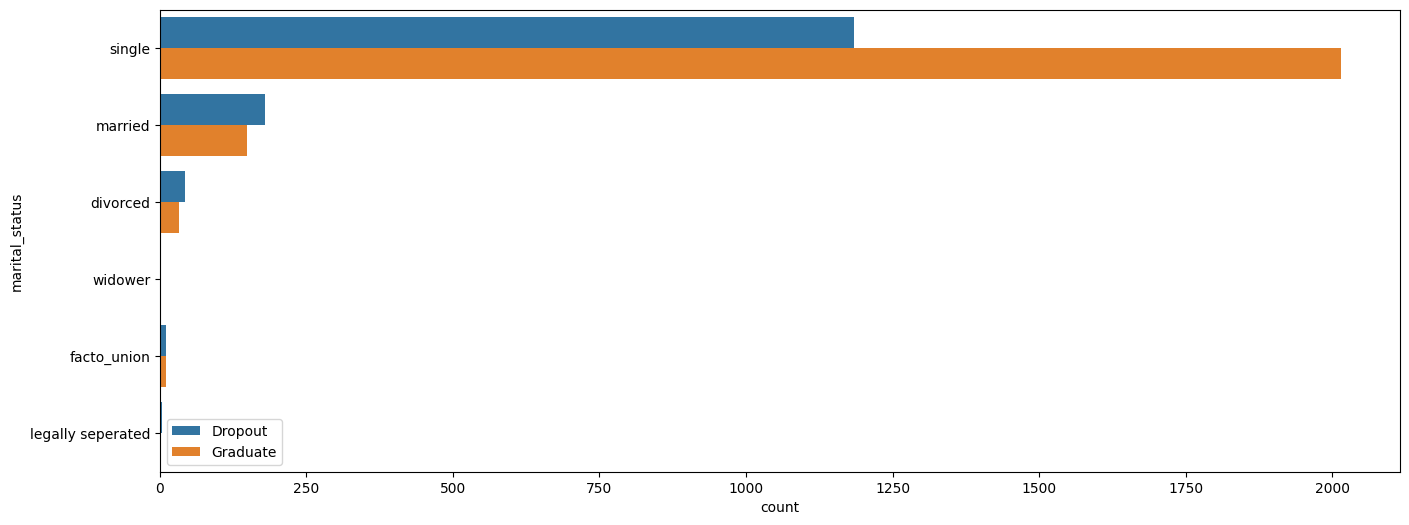

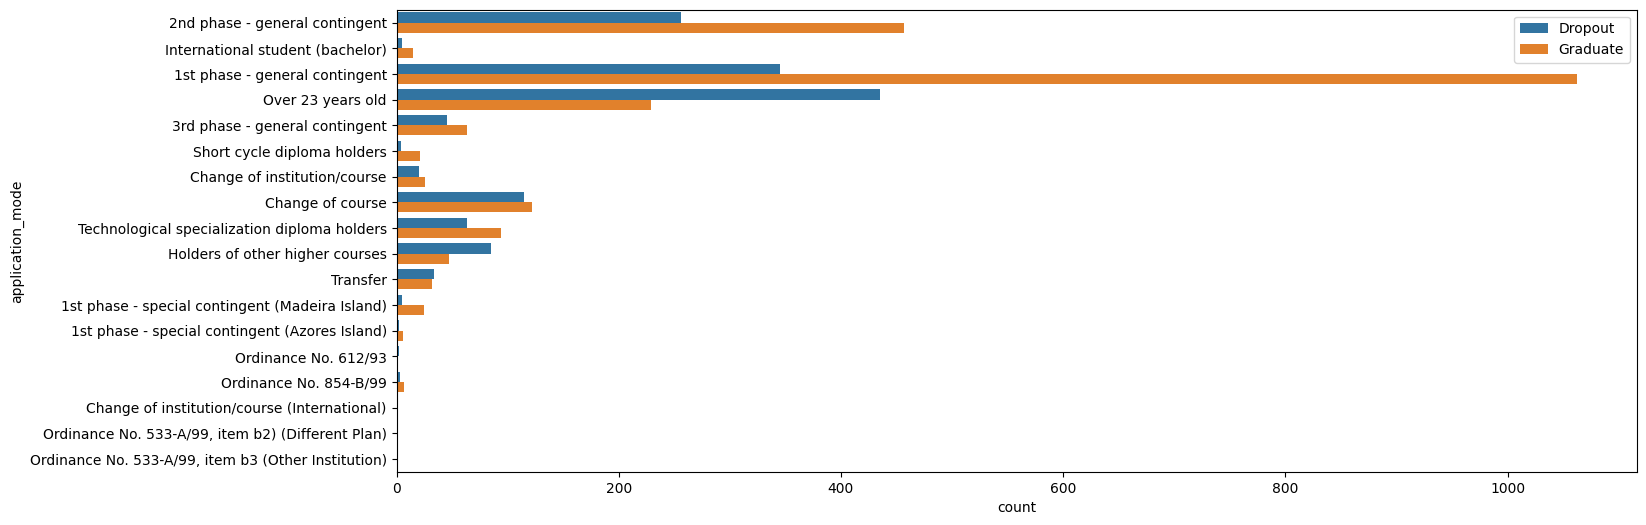

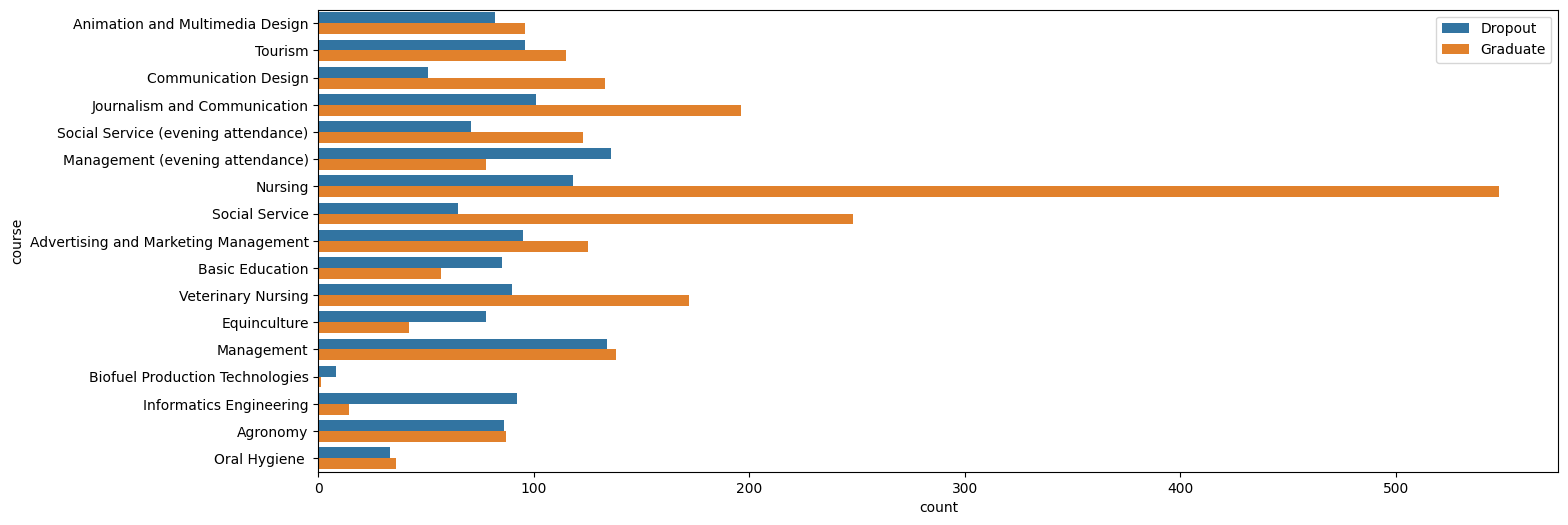

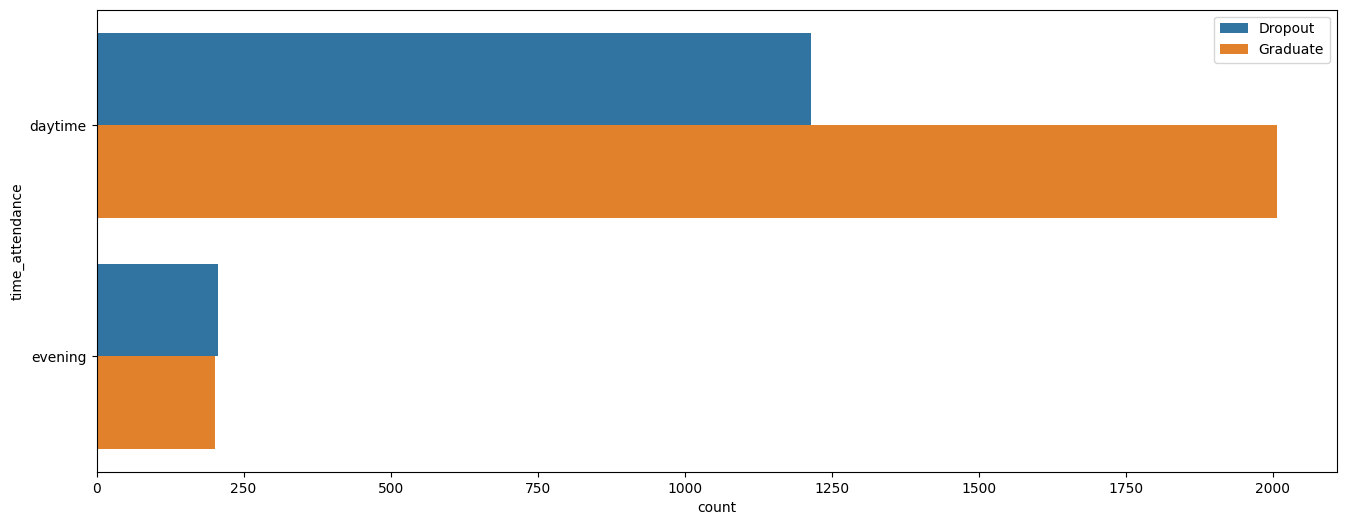

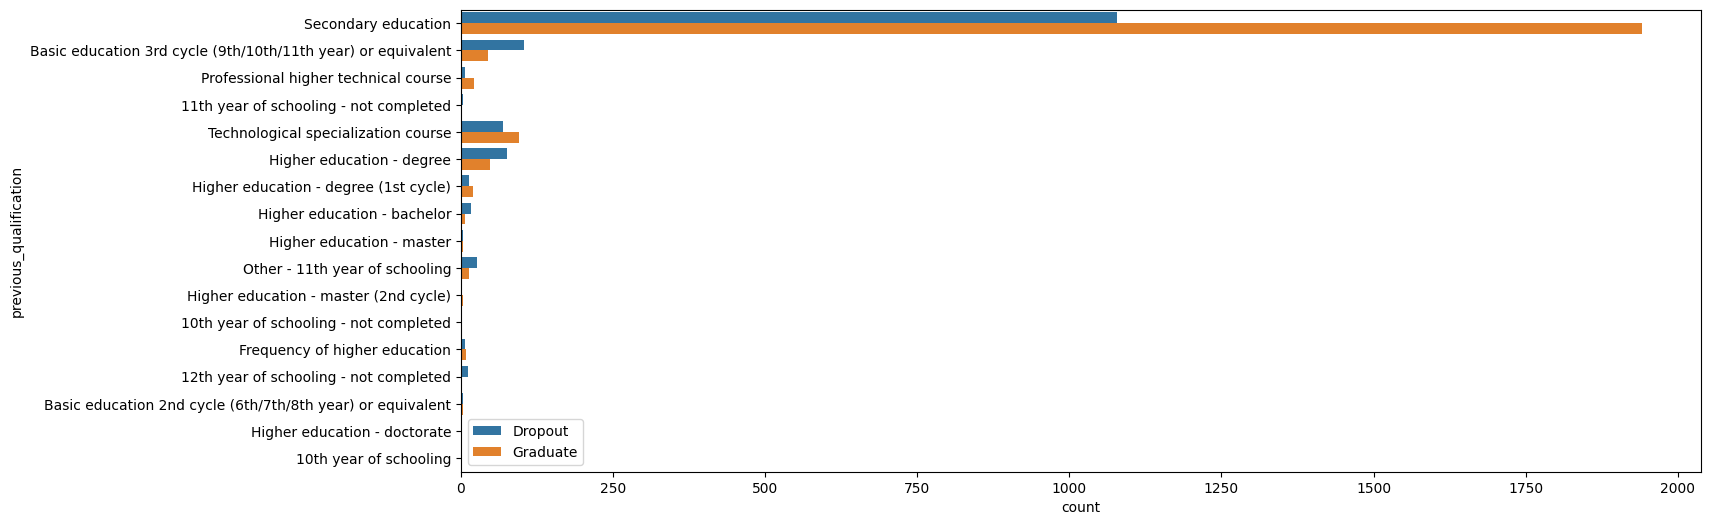

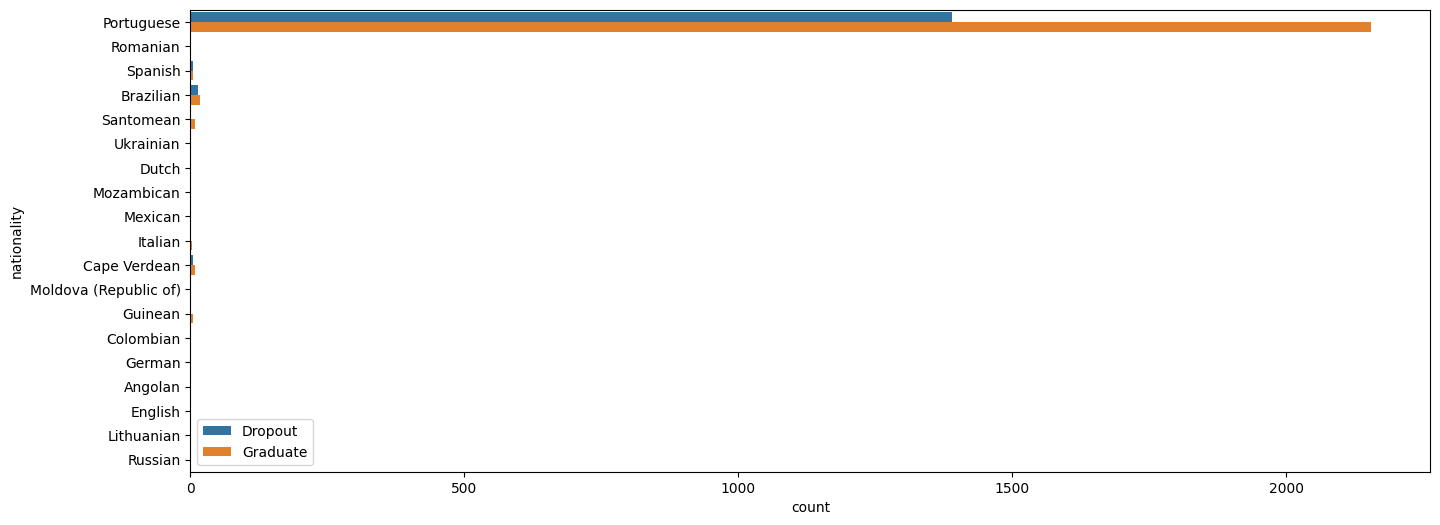

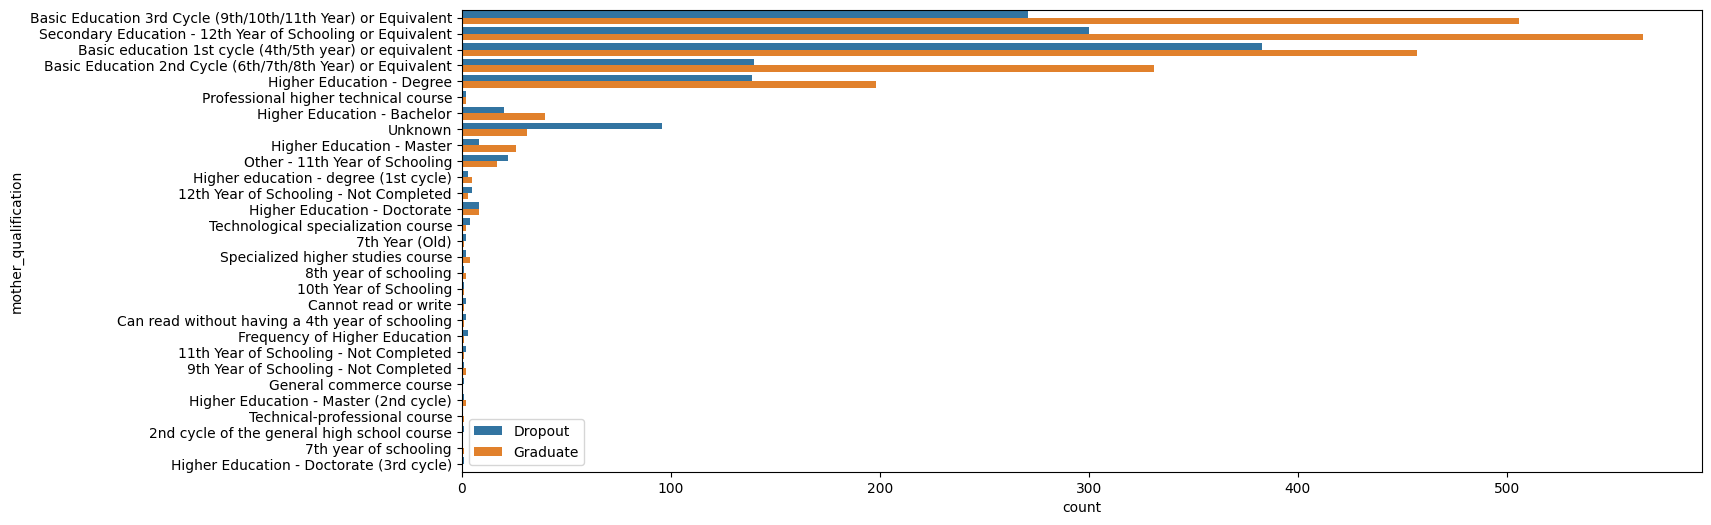

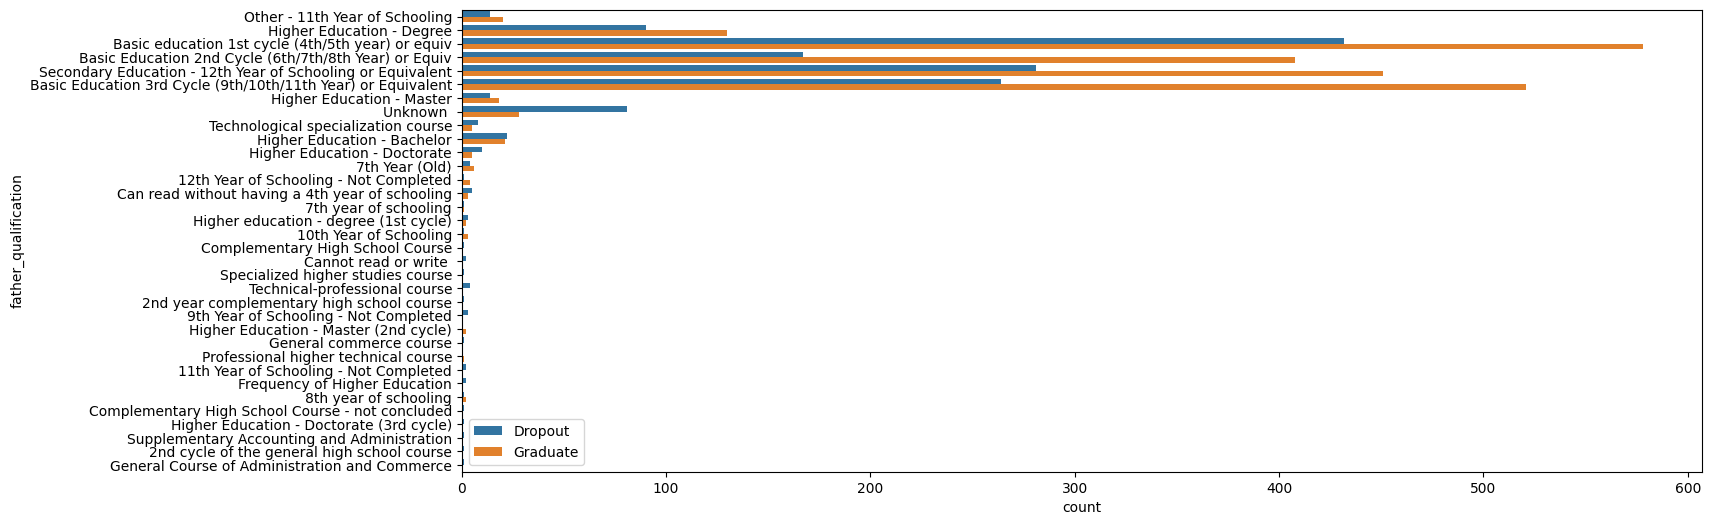

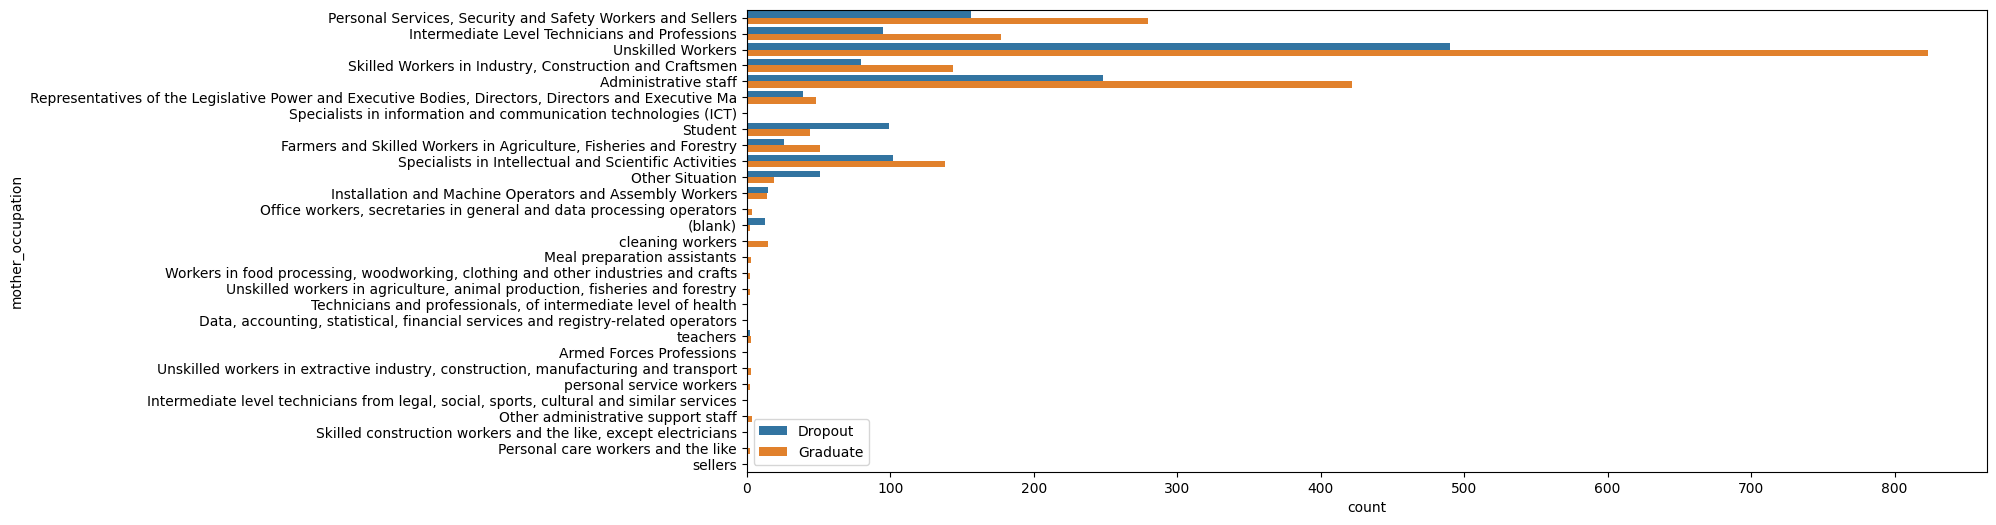

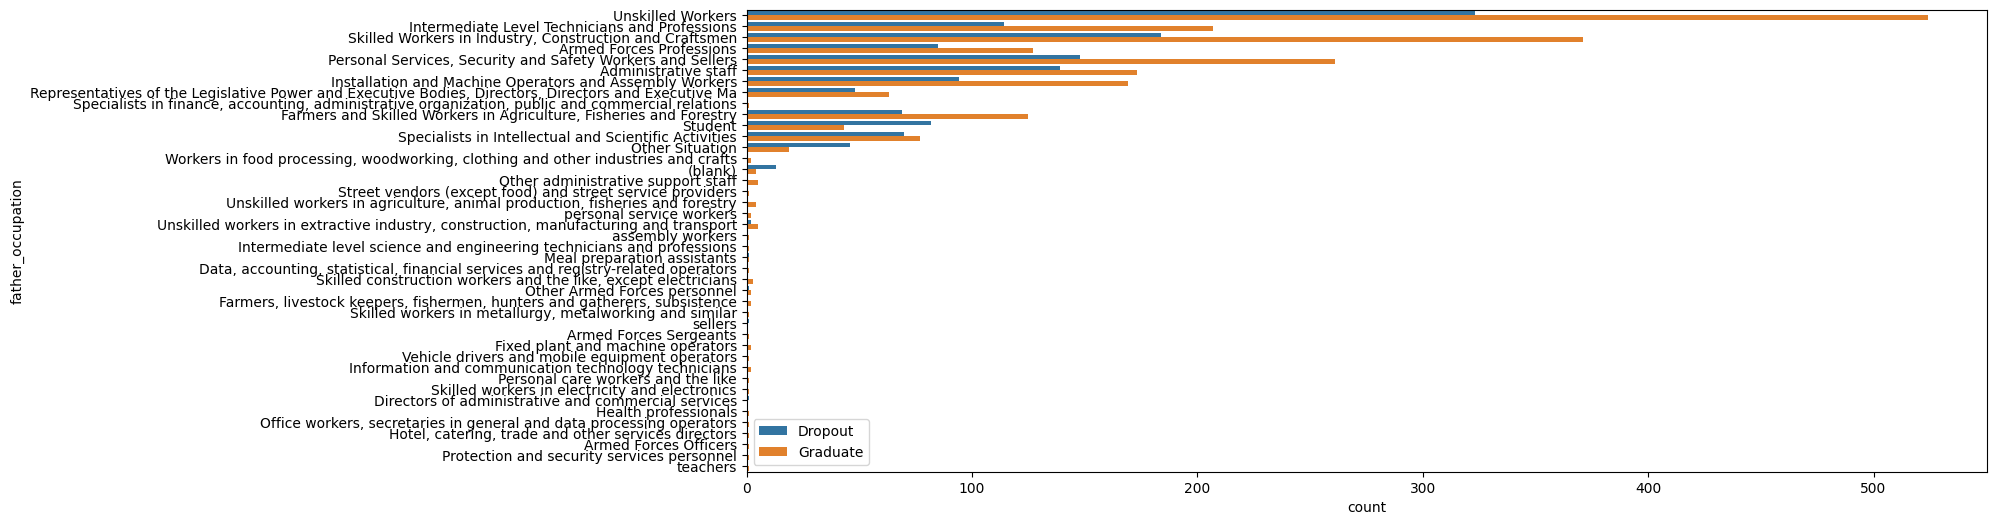

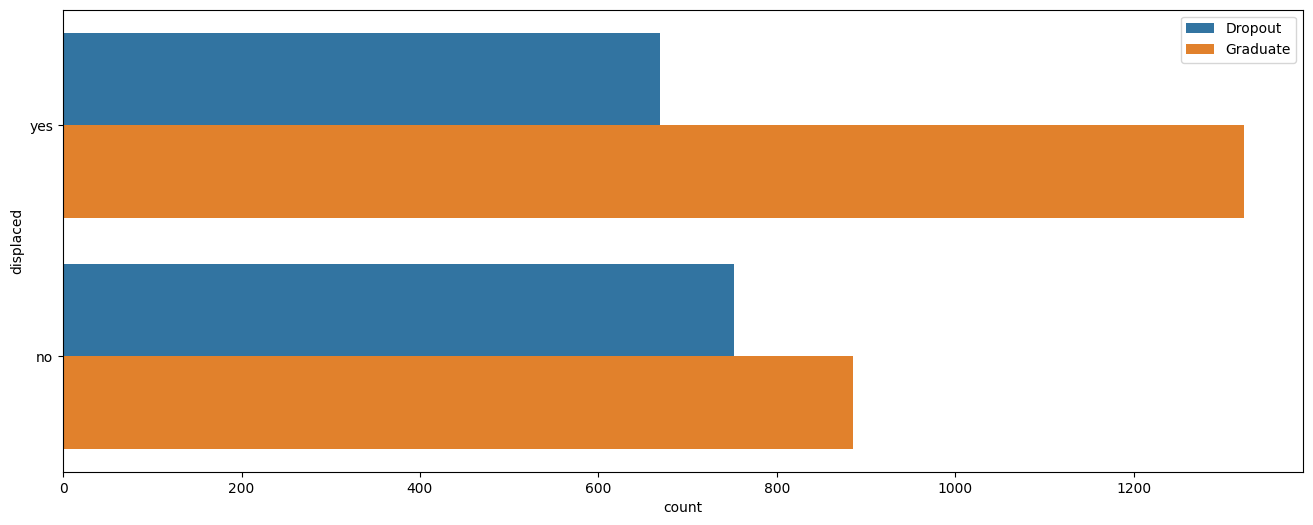

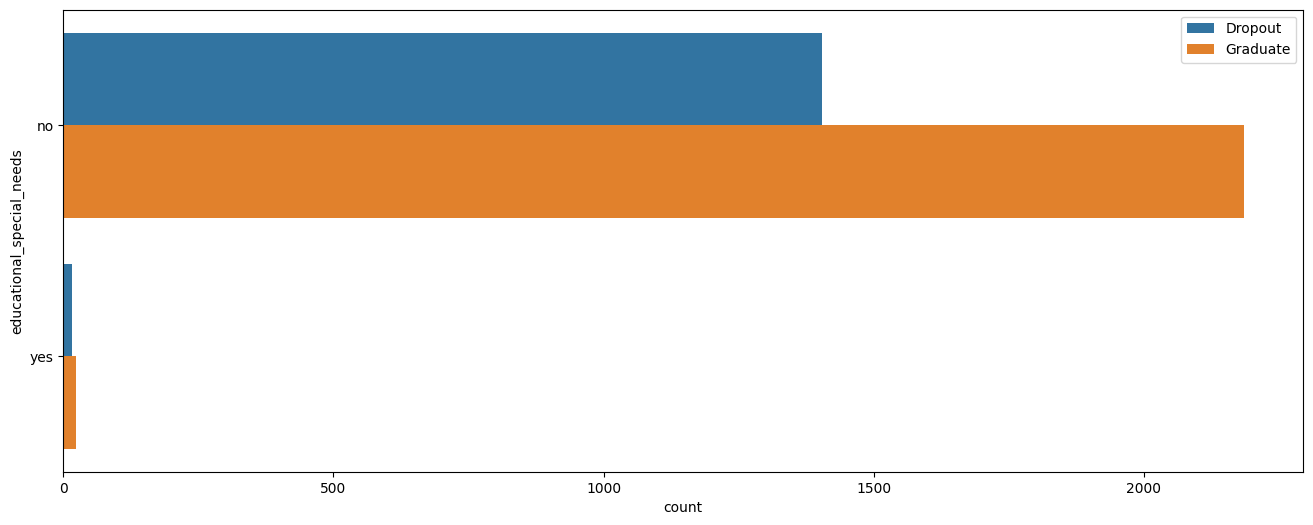

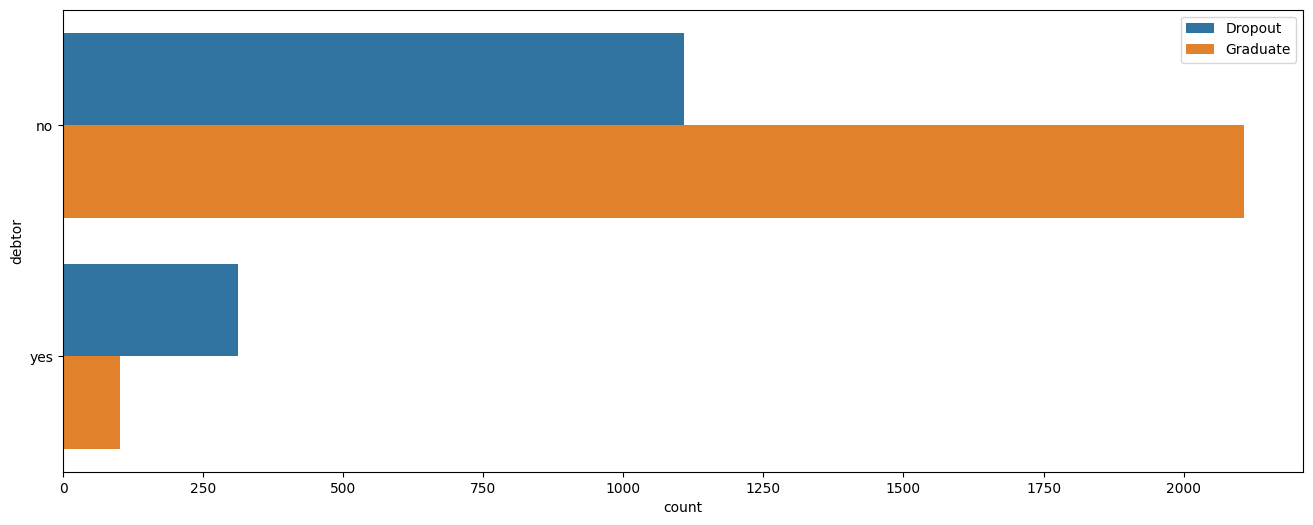

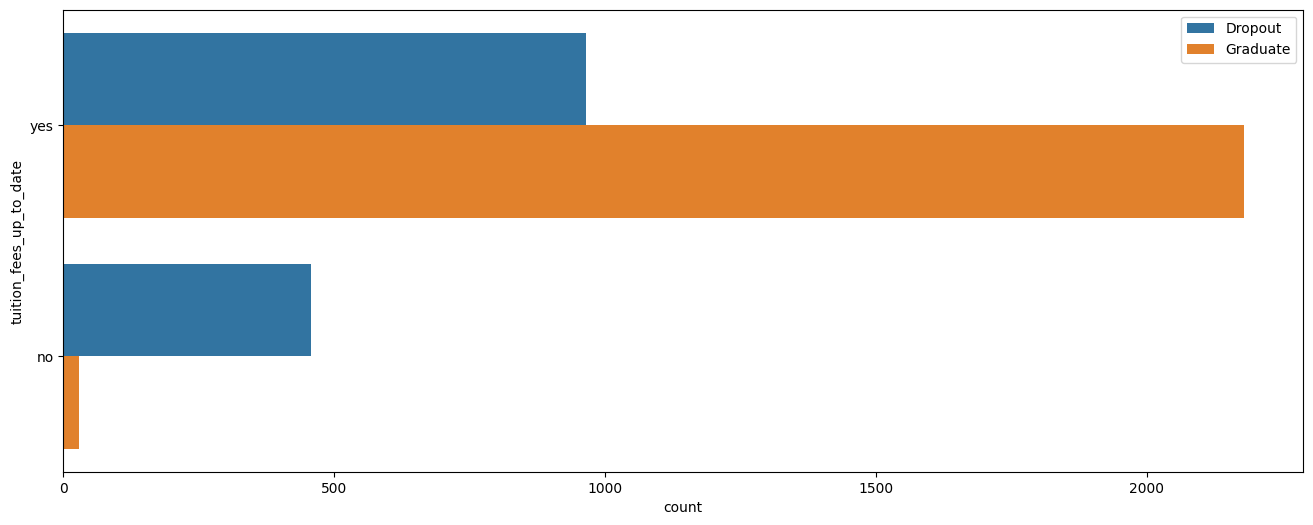

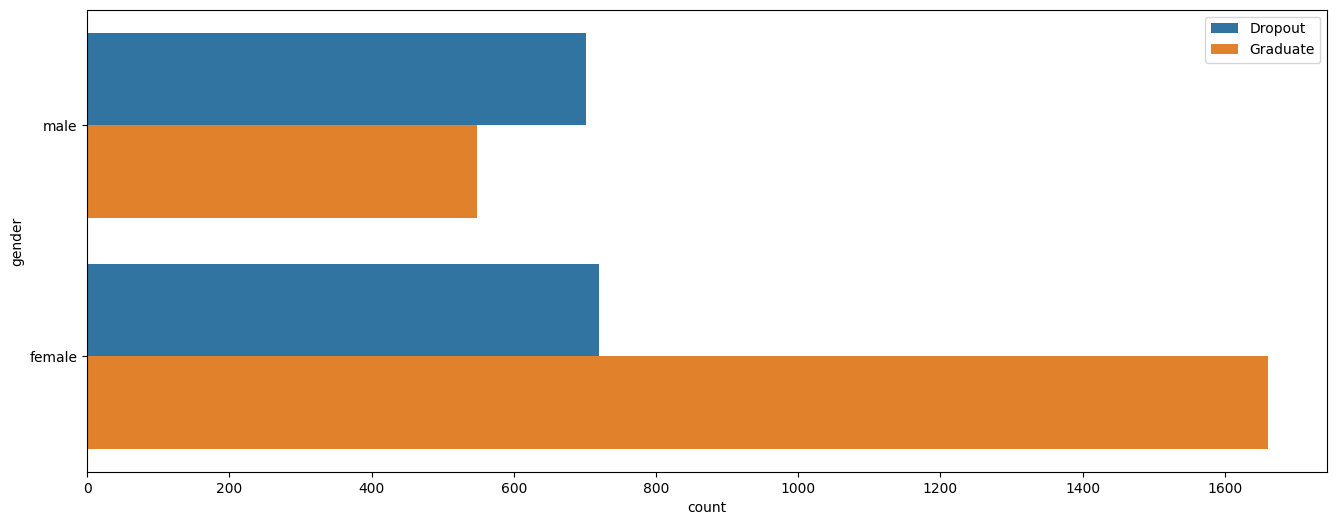

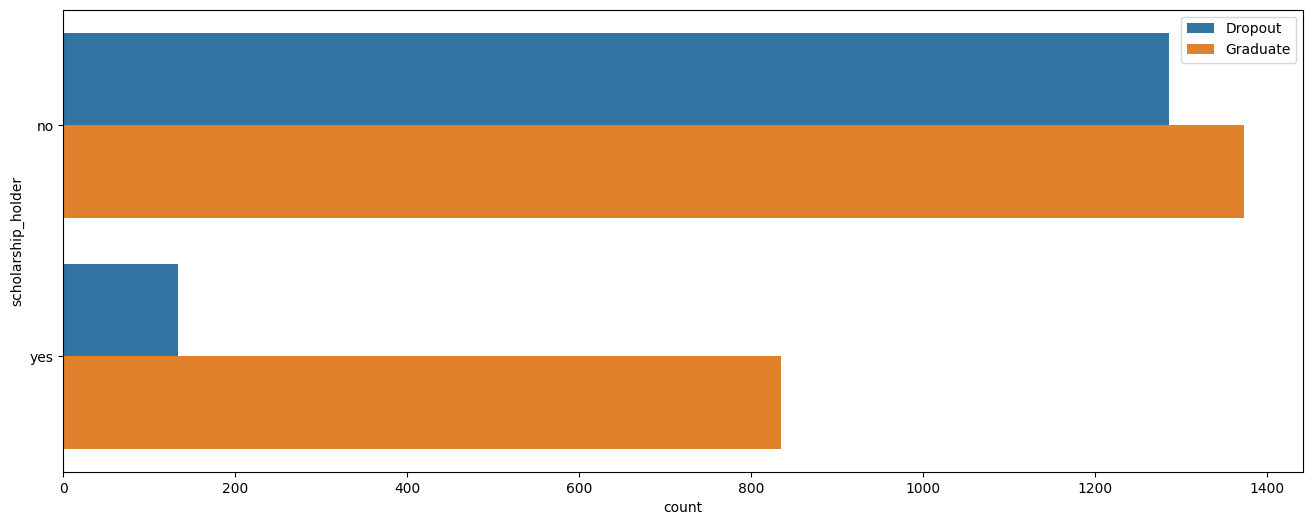

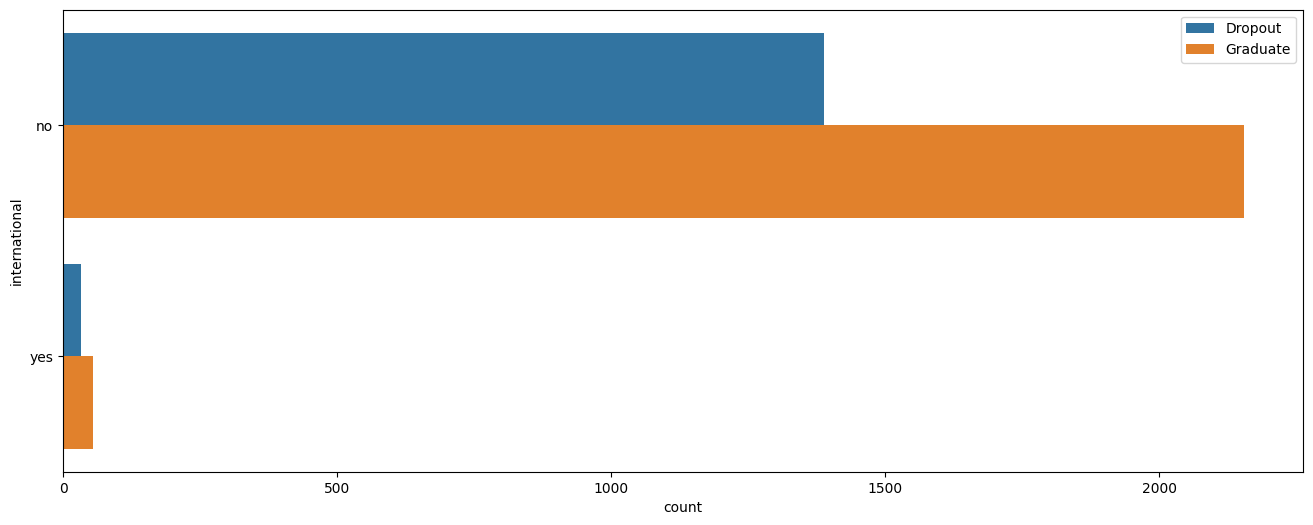

In [106]:
for i in categorical_variable.columns:
    plt.figure(figsize=(16,6))
    sns.countplot(categorical_variable, y=i, hue=status, orient='v')
    plt.show()

Now we see if the data is normally distributed.

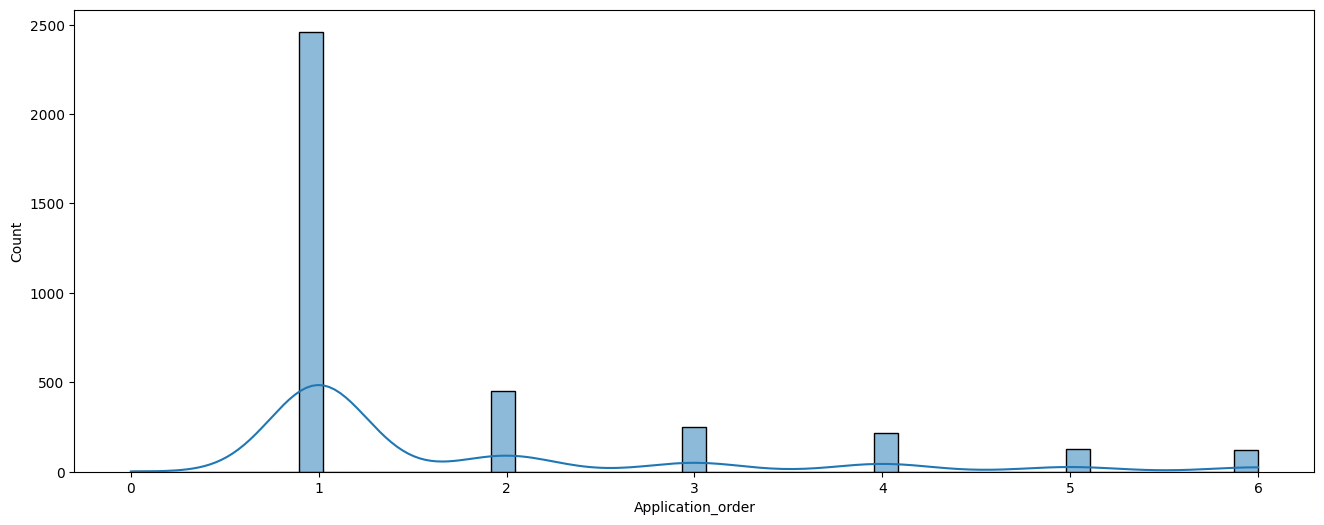

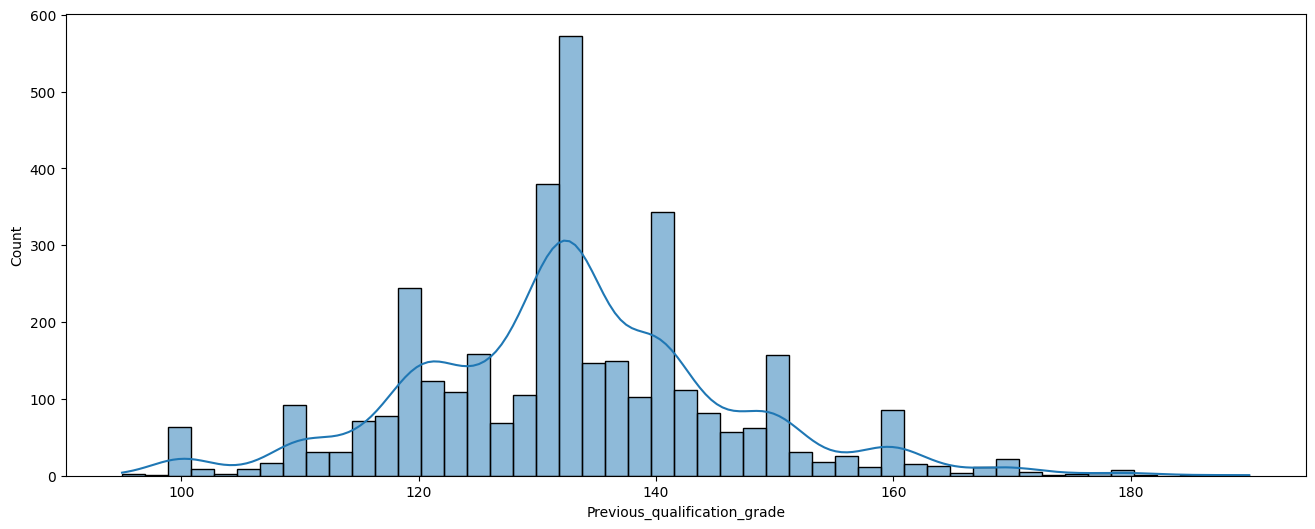

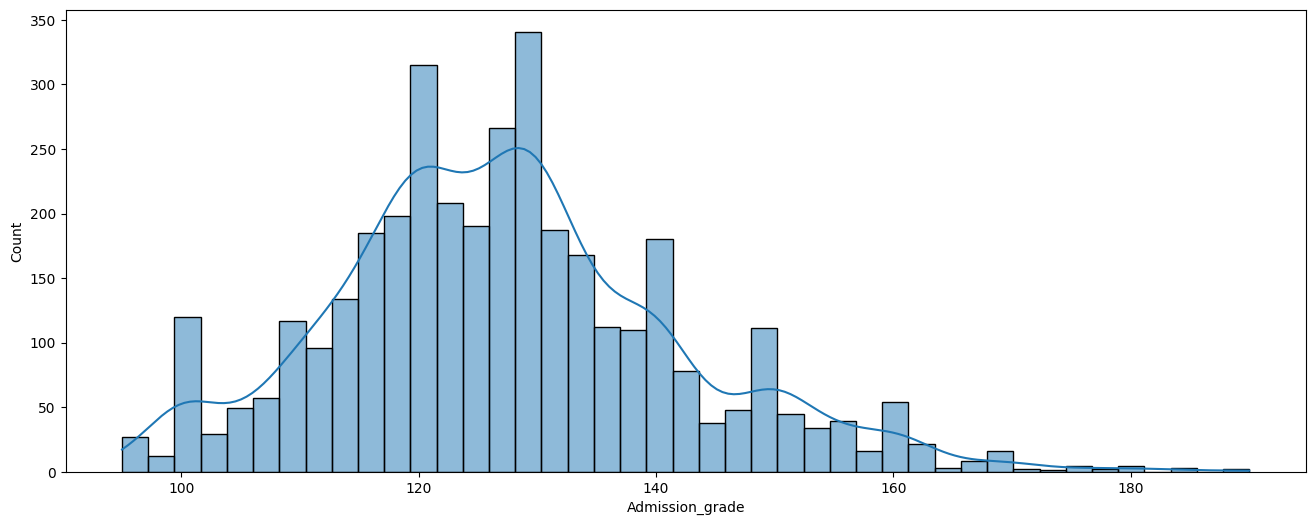

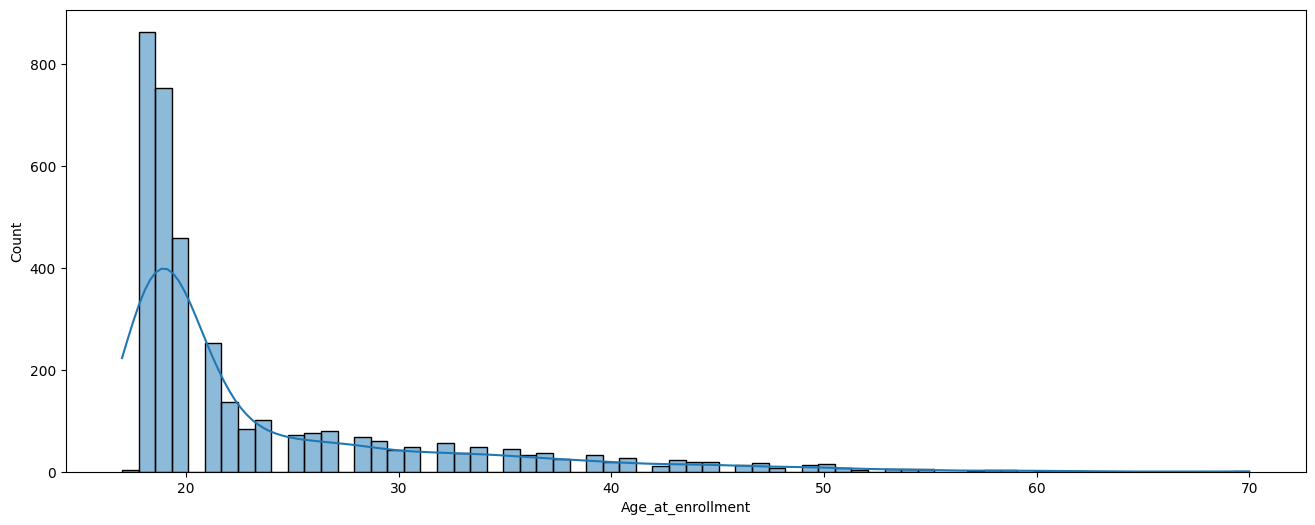

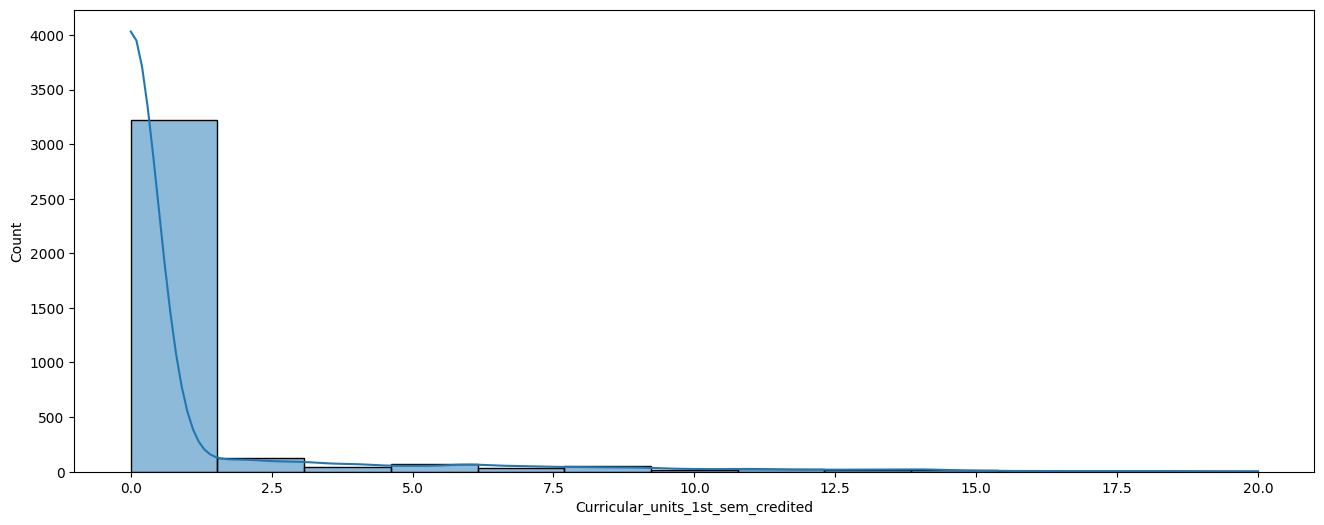

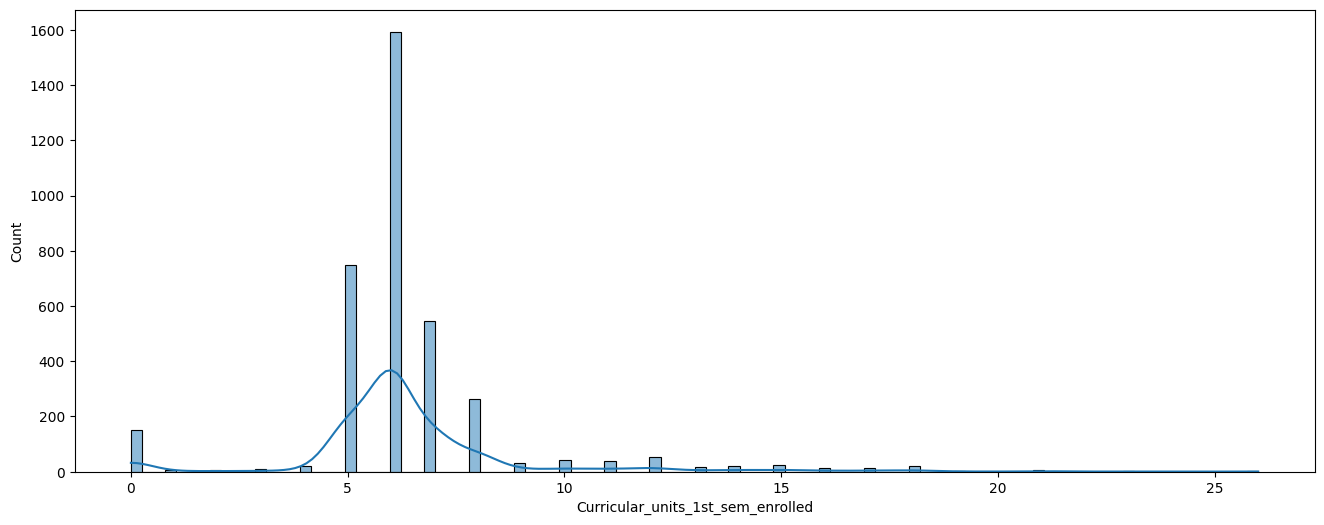

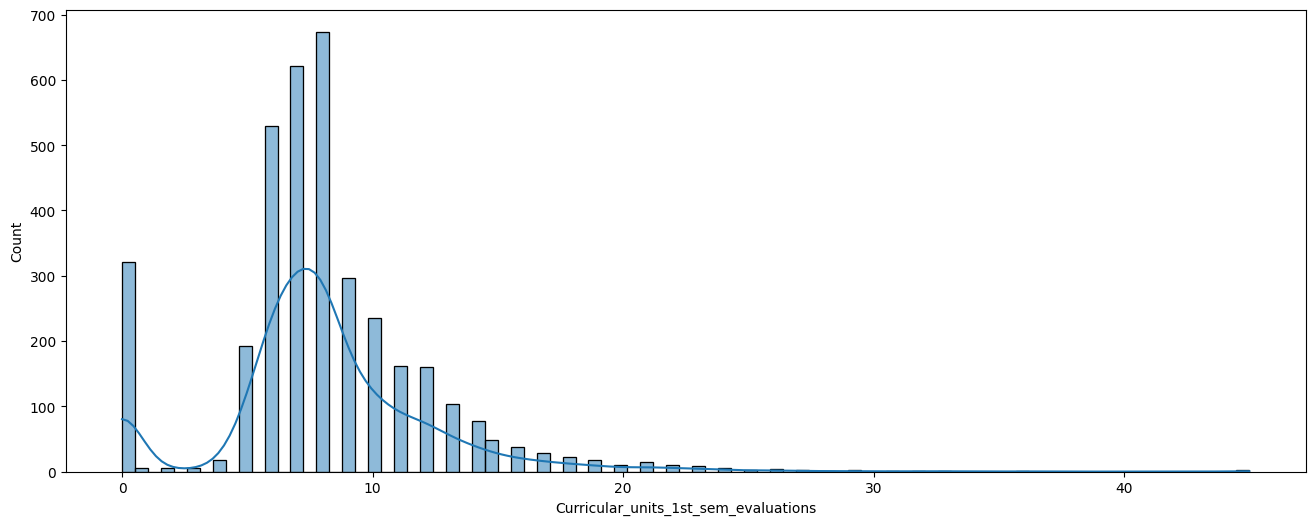

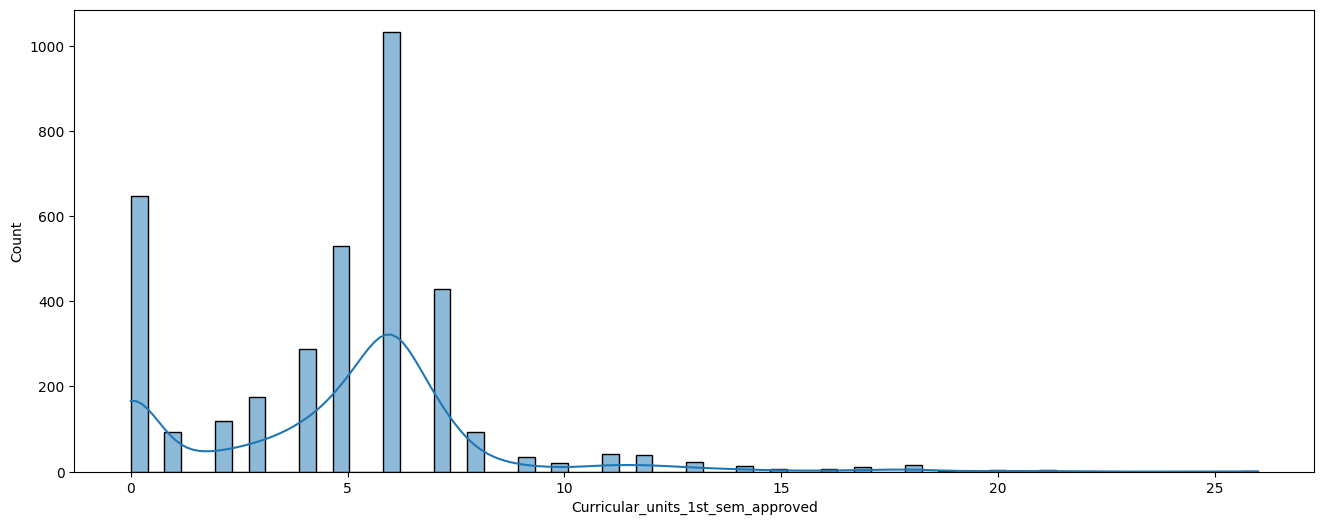

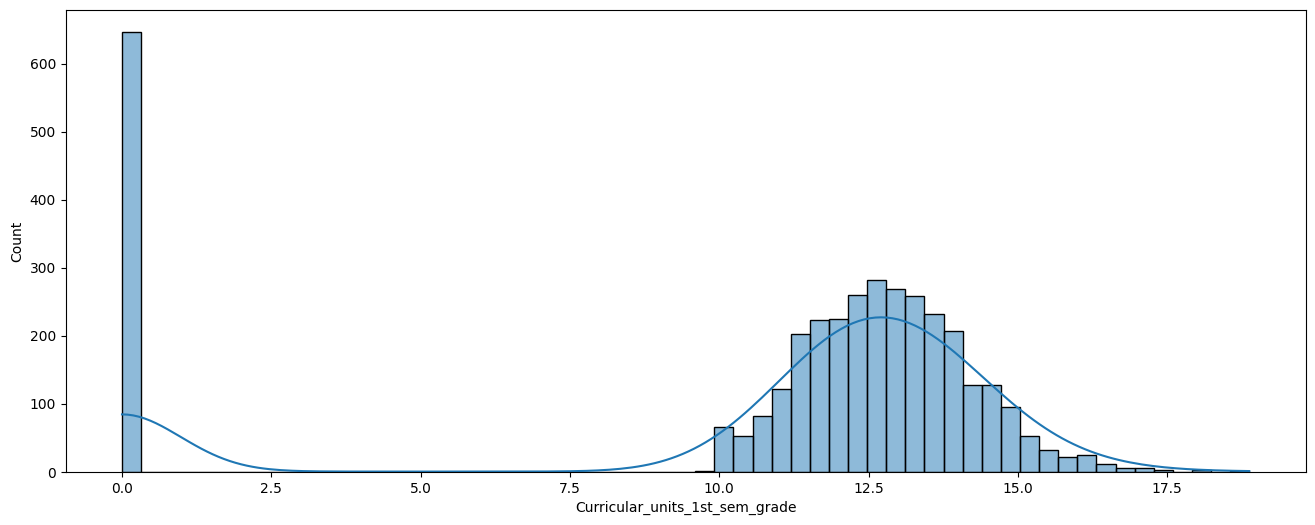

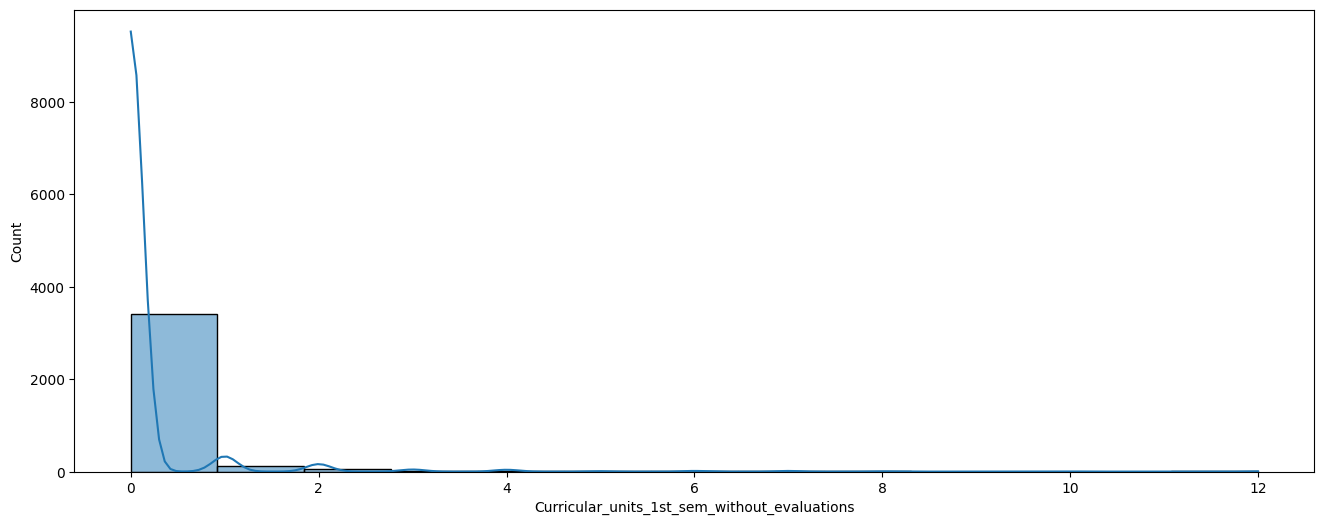

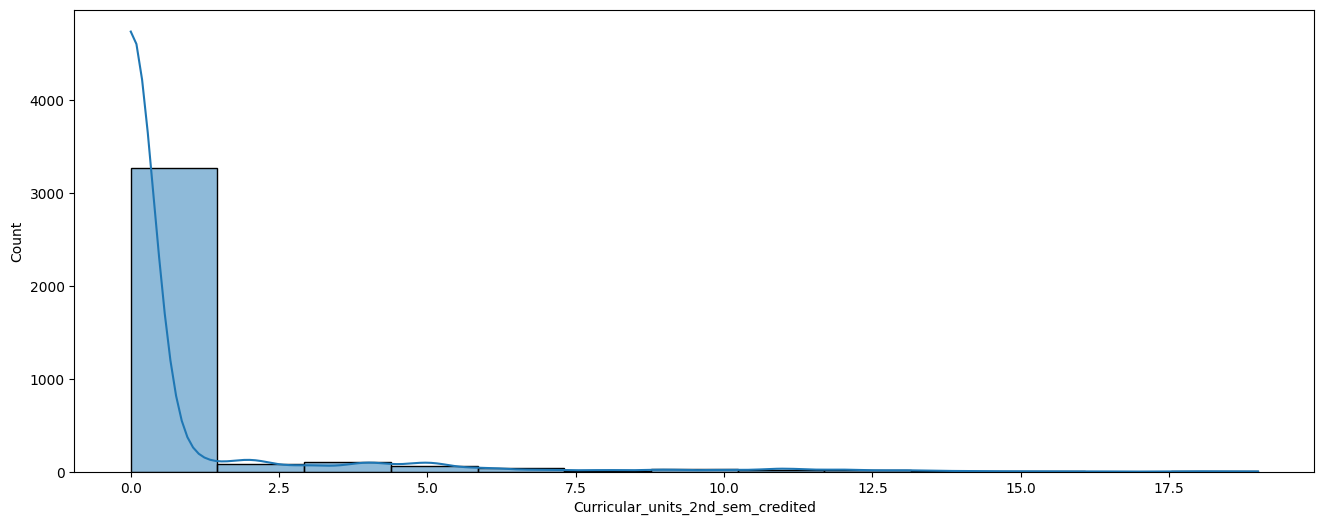

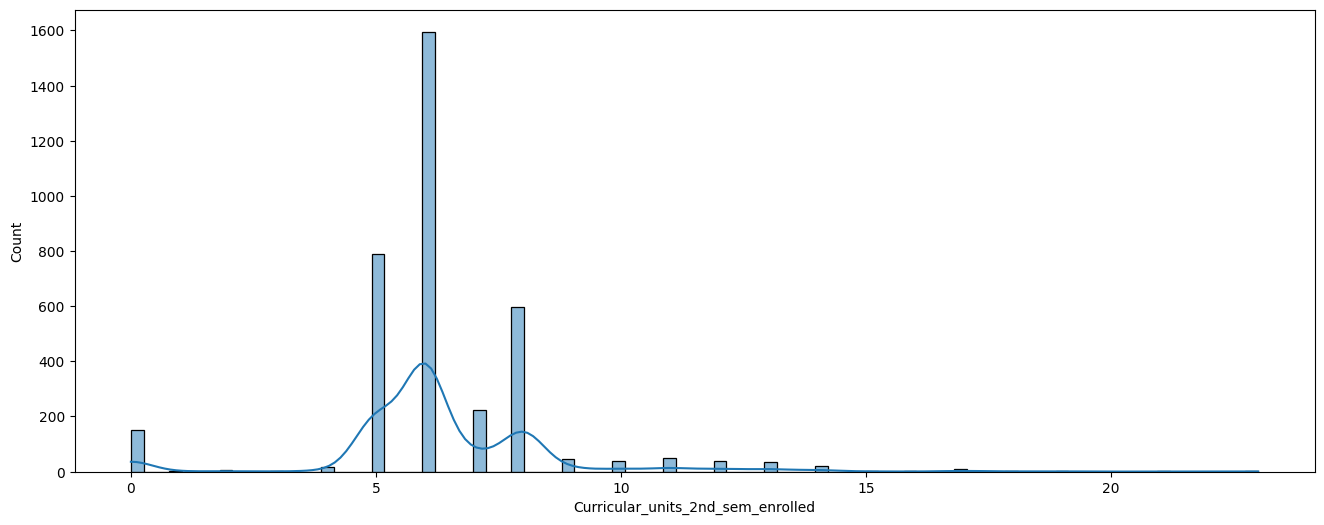

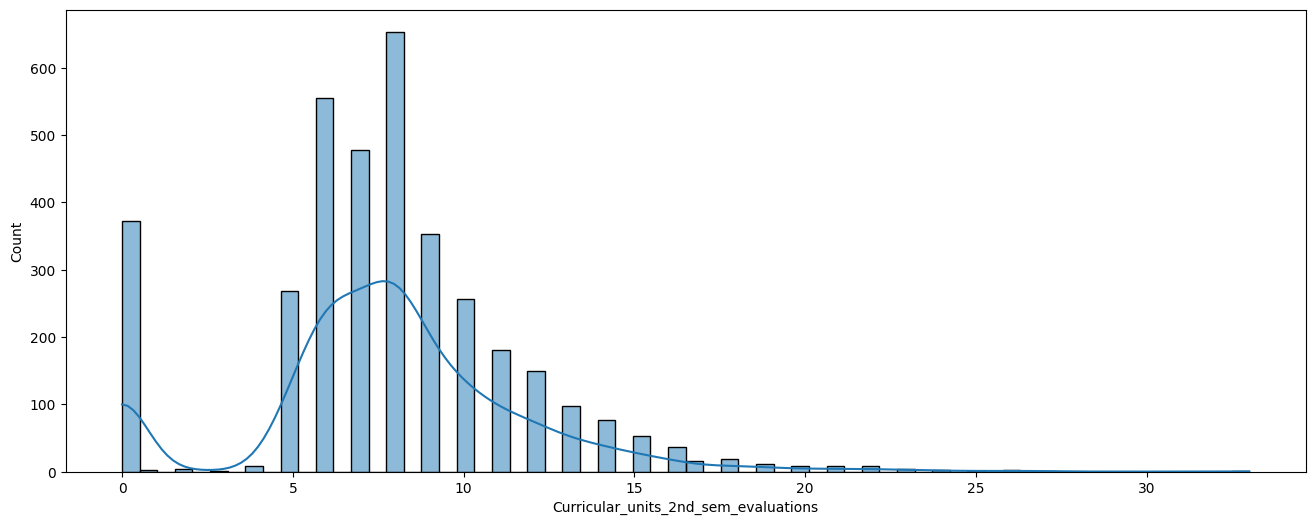

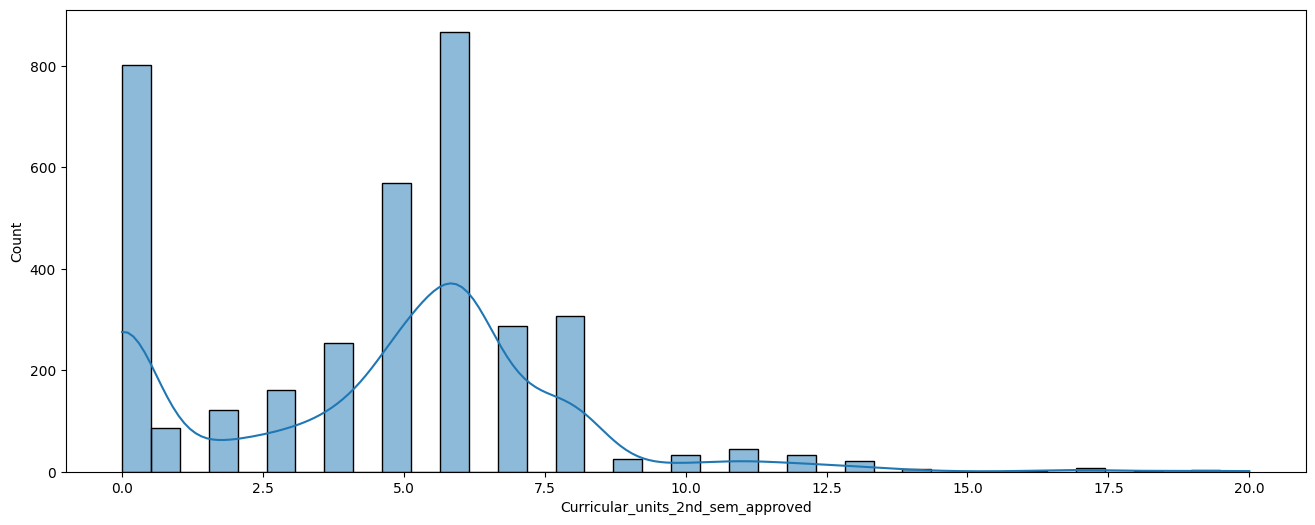

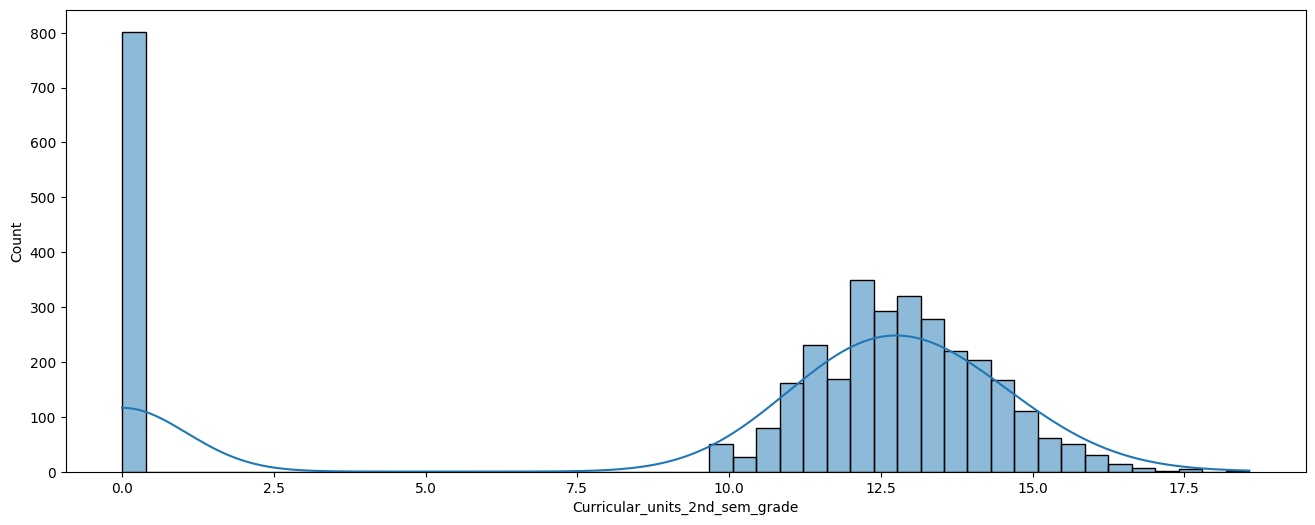

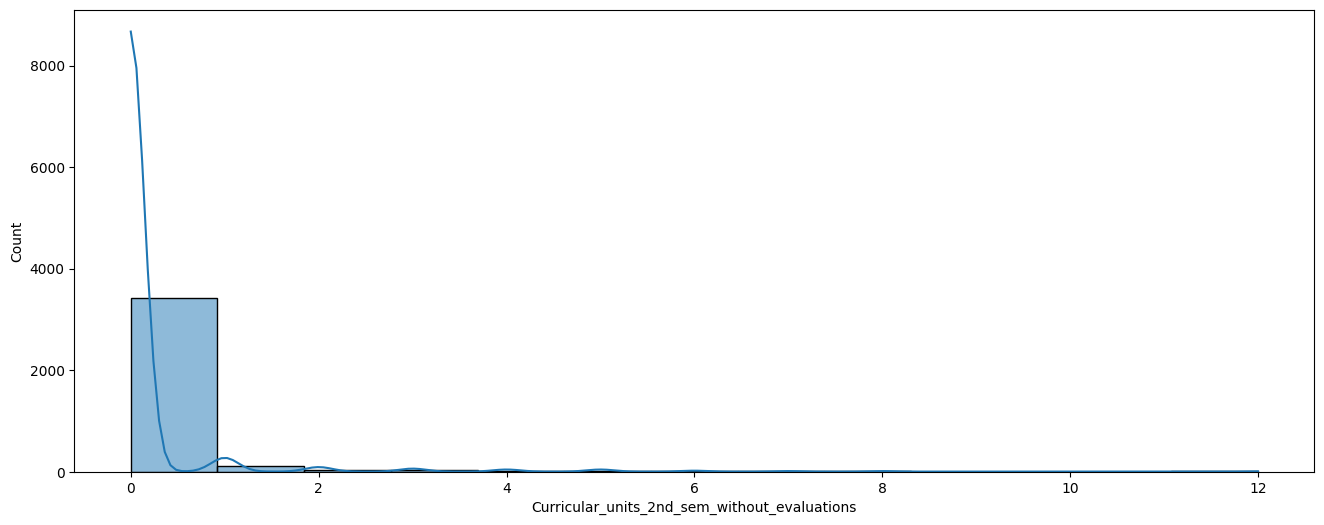

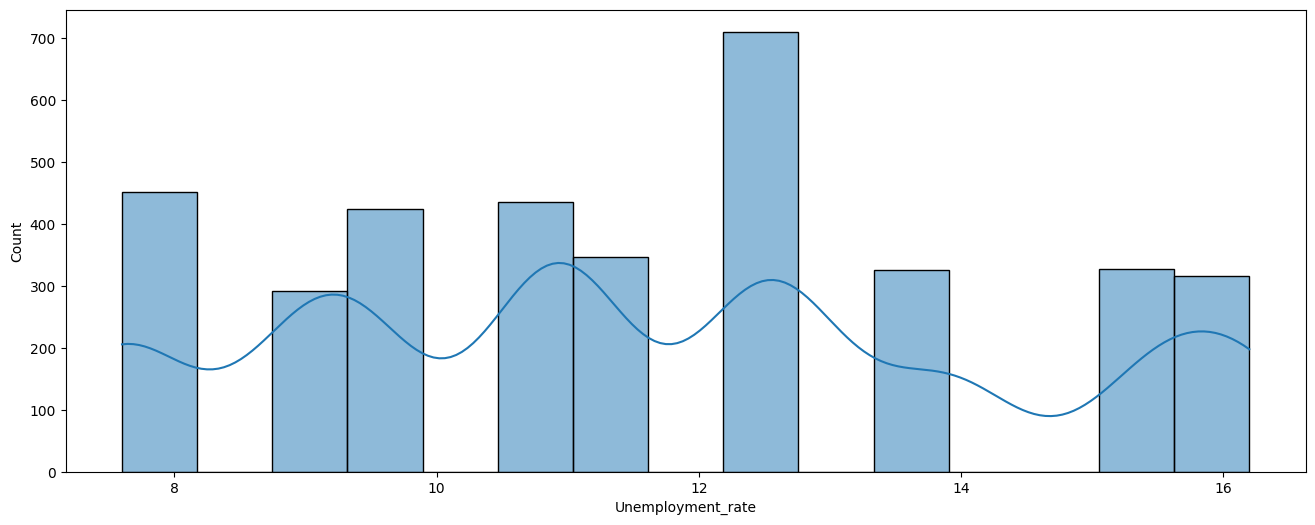

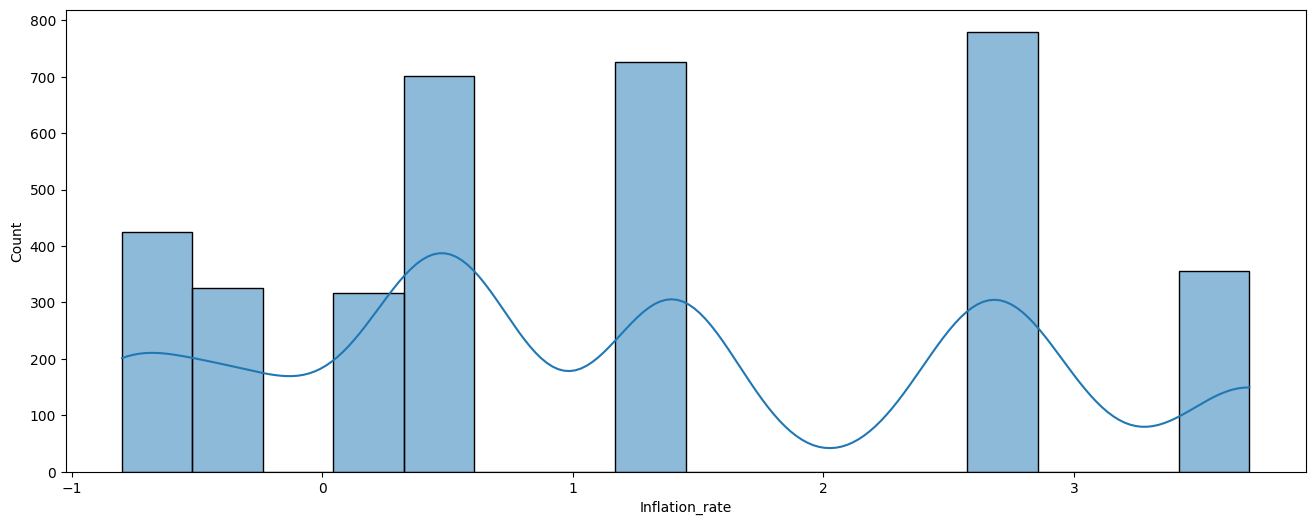

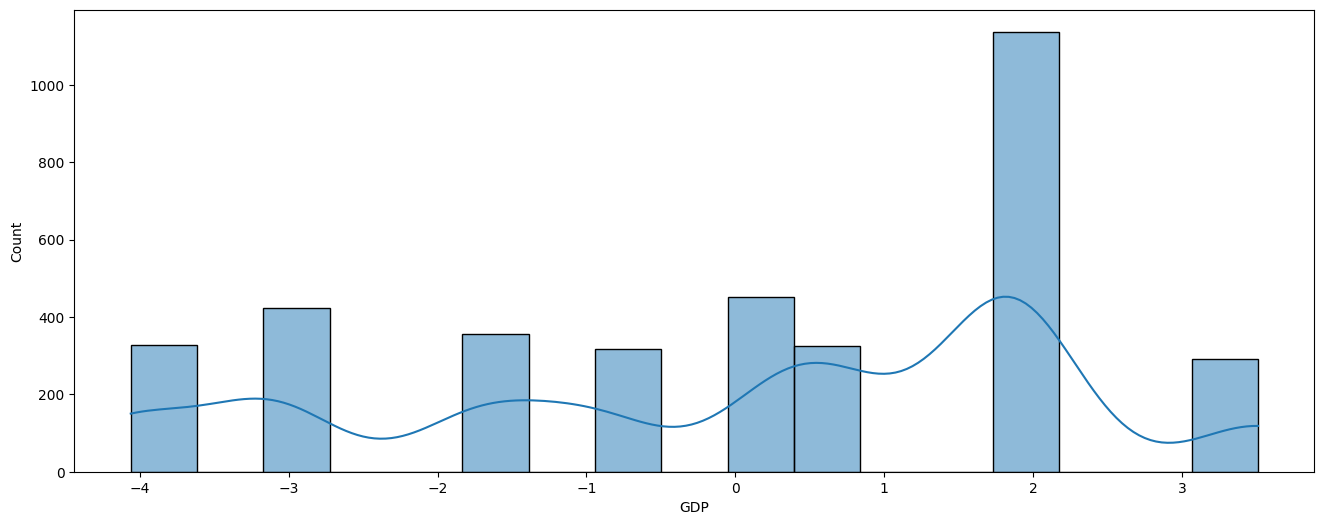

In [107]:
for i in numeric_variable.columns:
    plt.figure(figsize=(16,6))
    sns.histplot(numeric_variable, x=i, kde=True)
    plt.show()

It looks like some variables are not normally distributed. So we cannot use parametric statistical test.

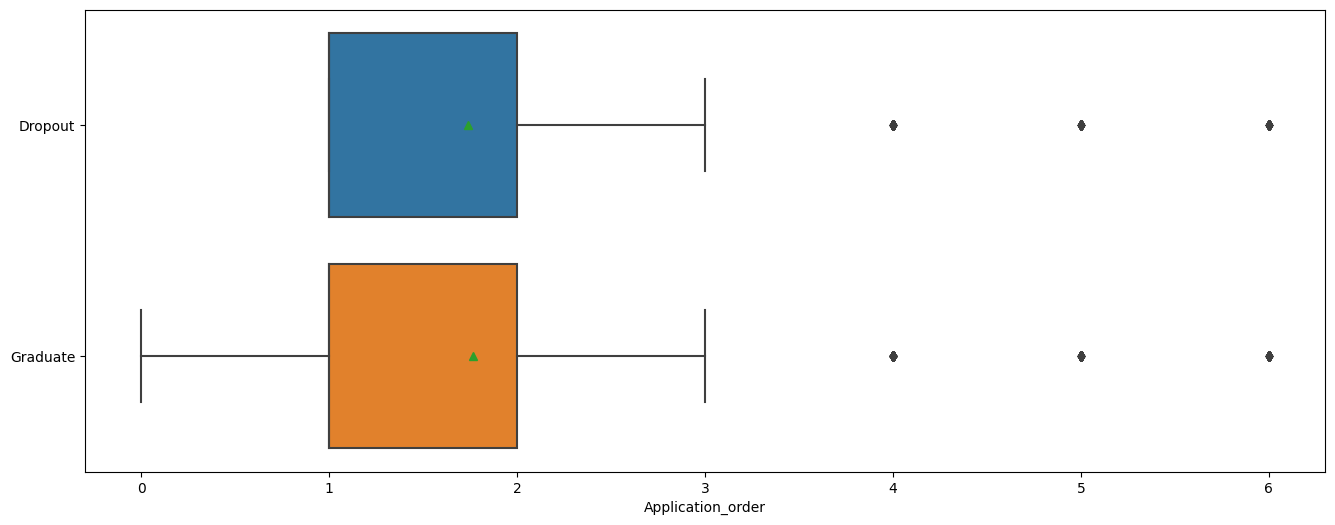

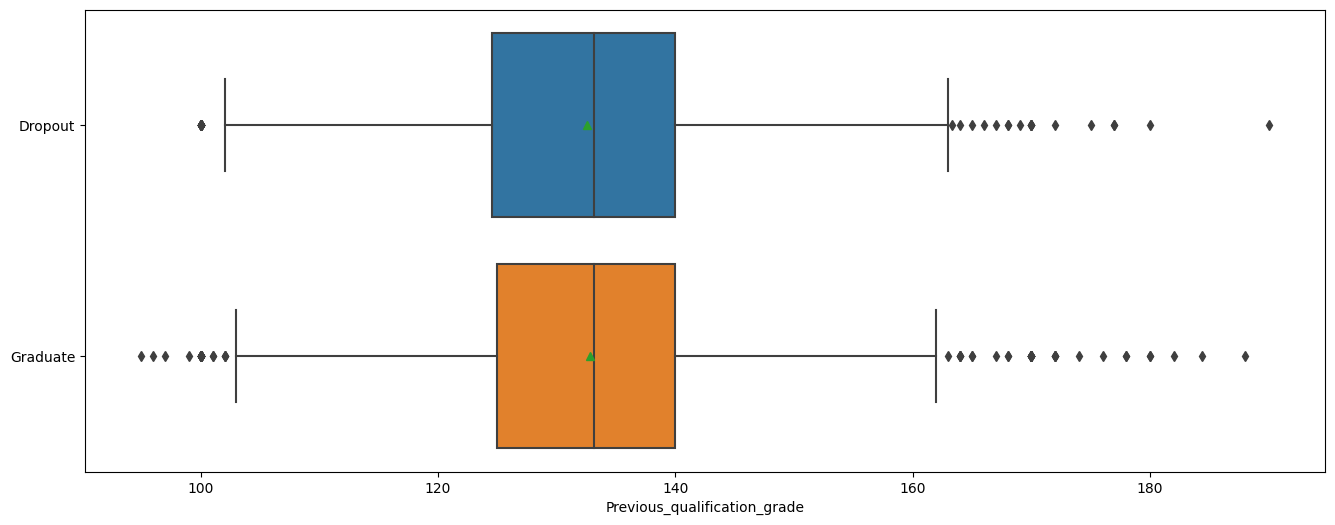

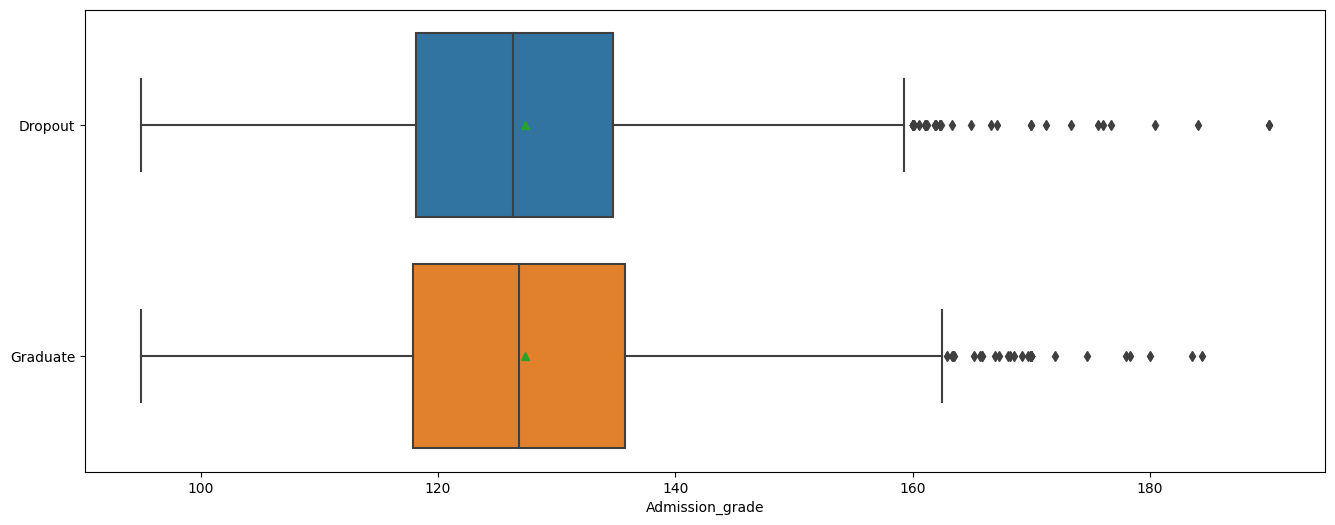

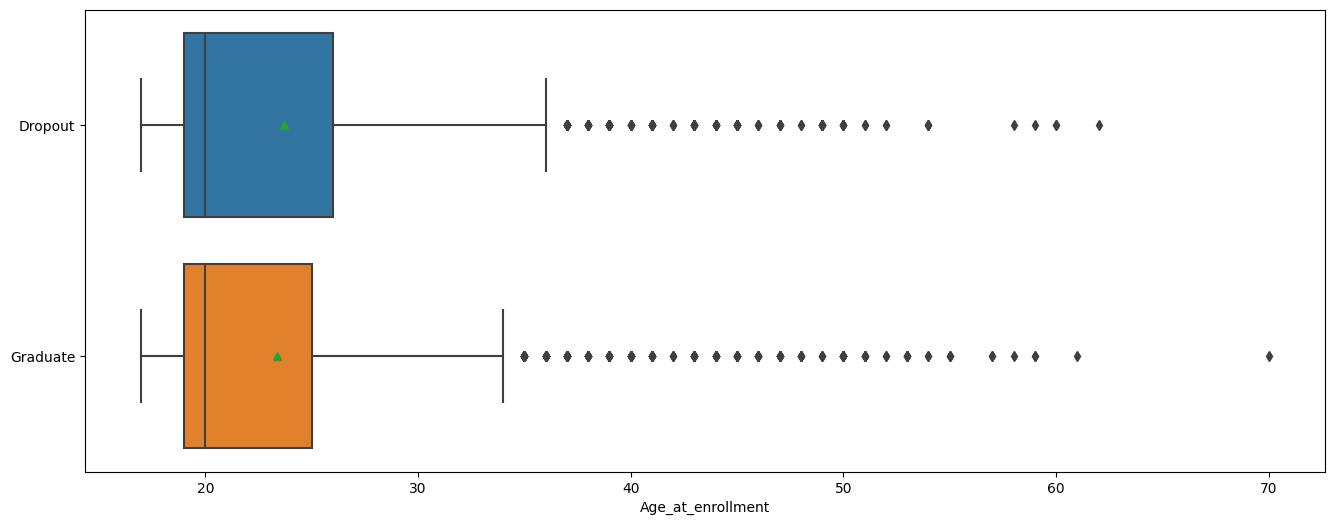

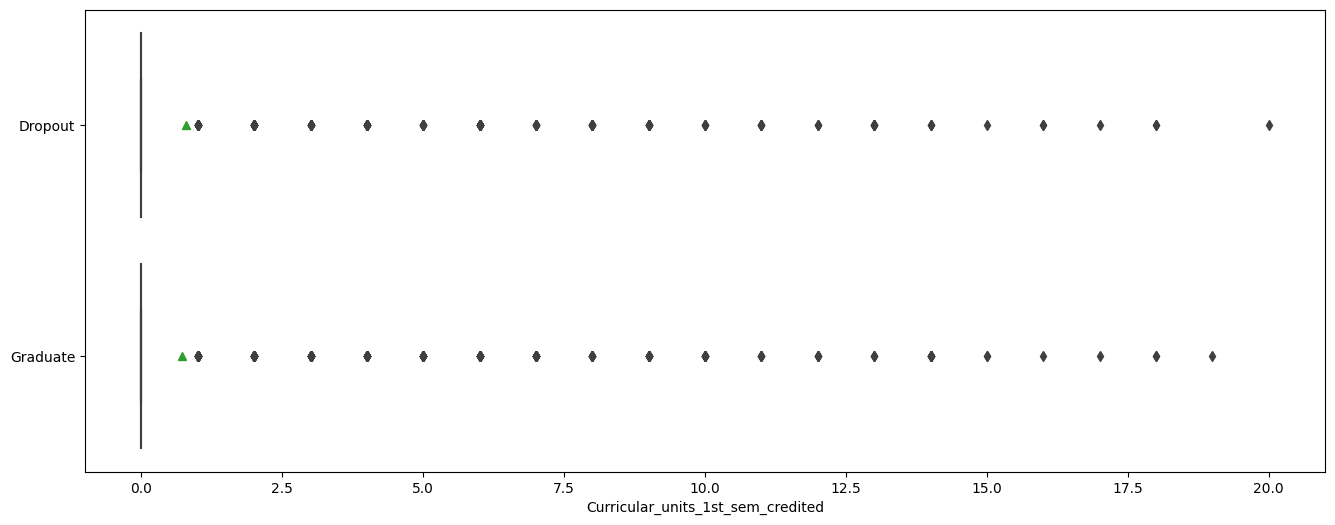

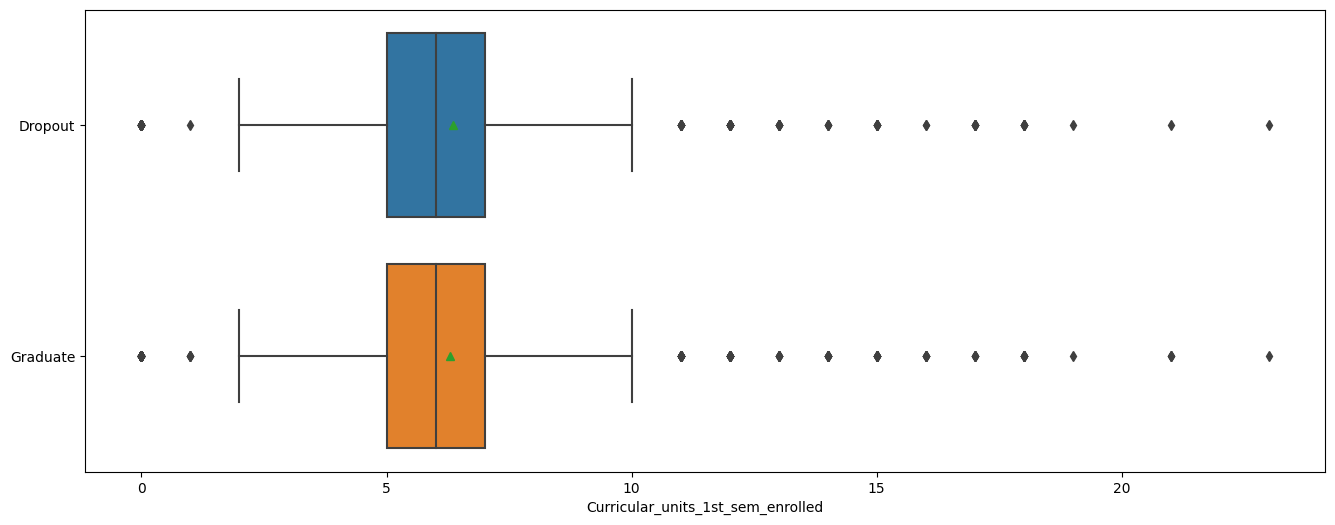

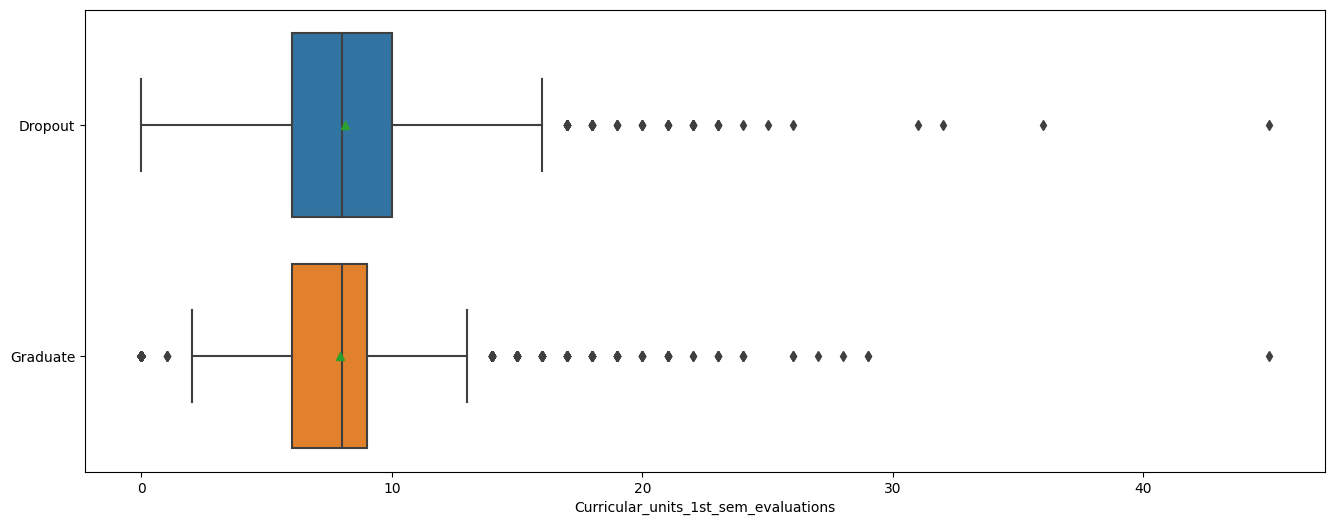

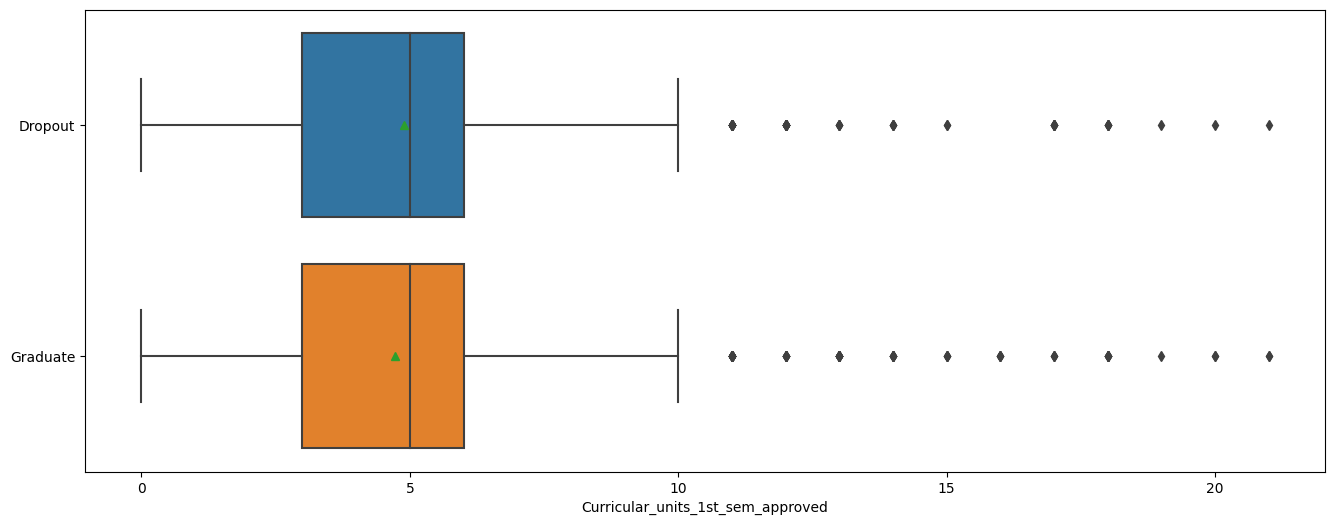

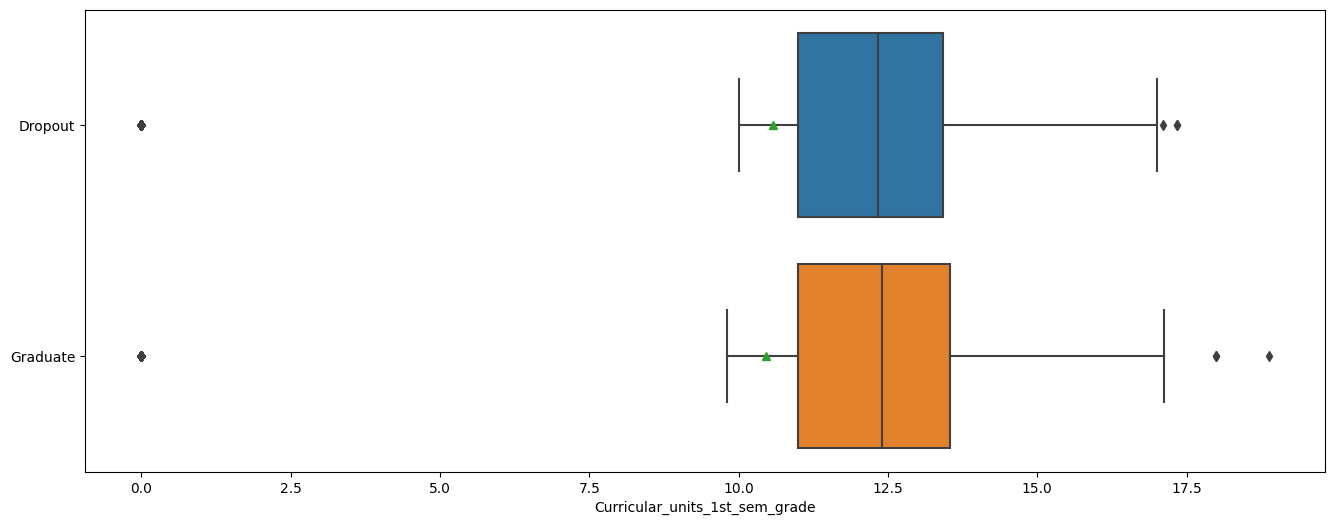

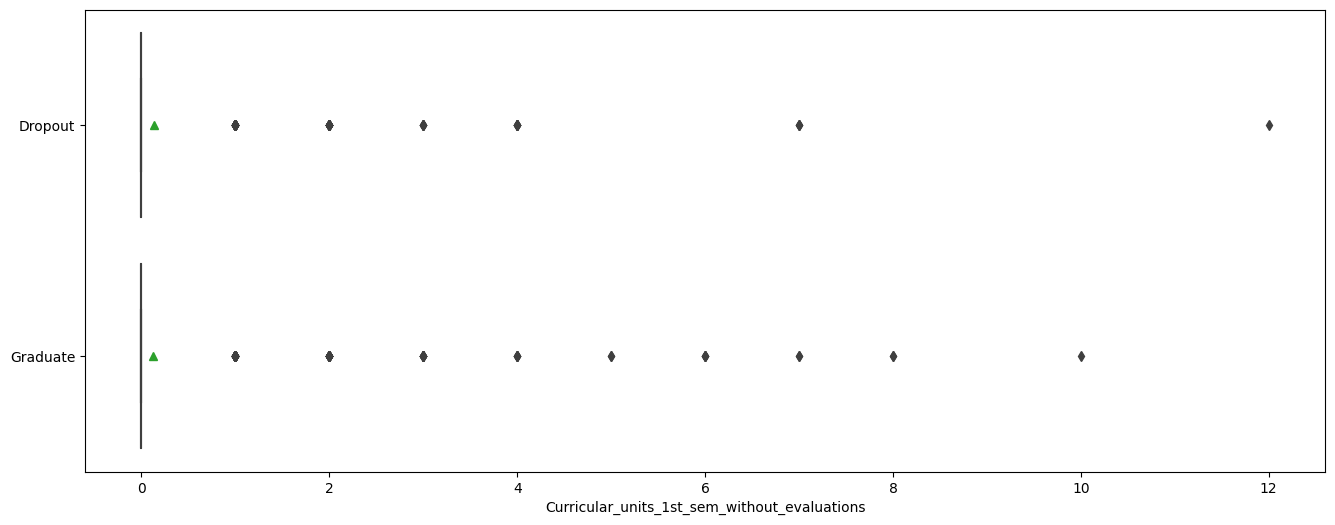

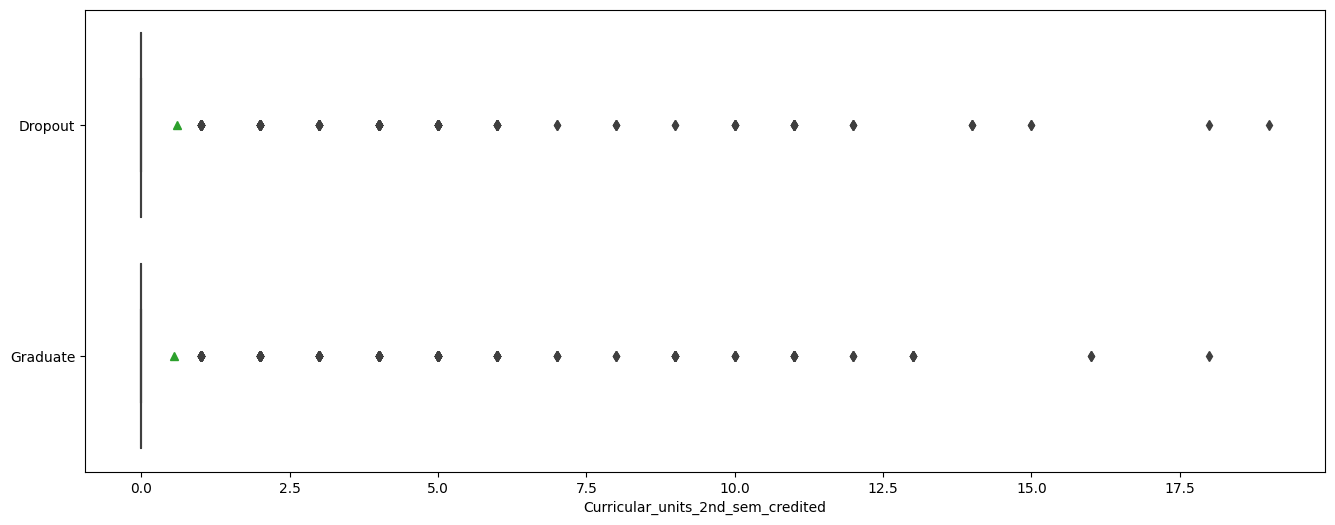

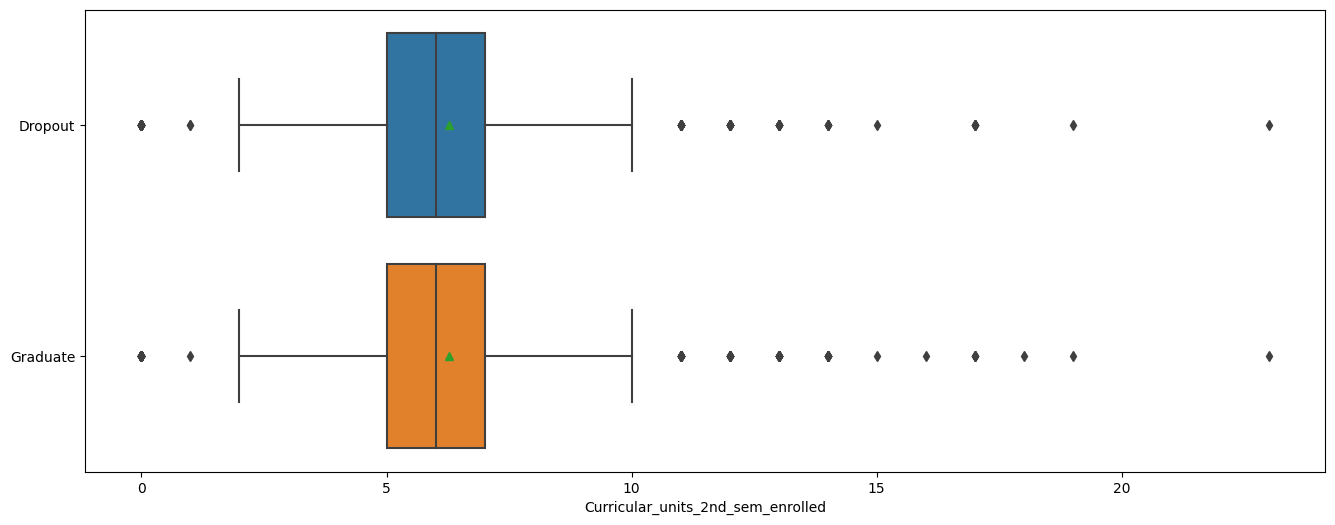

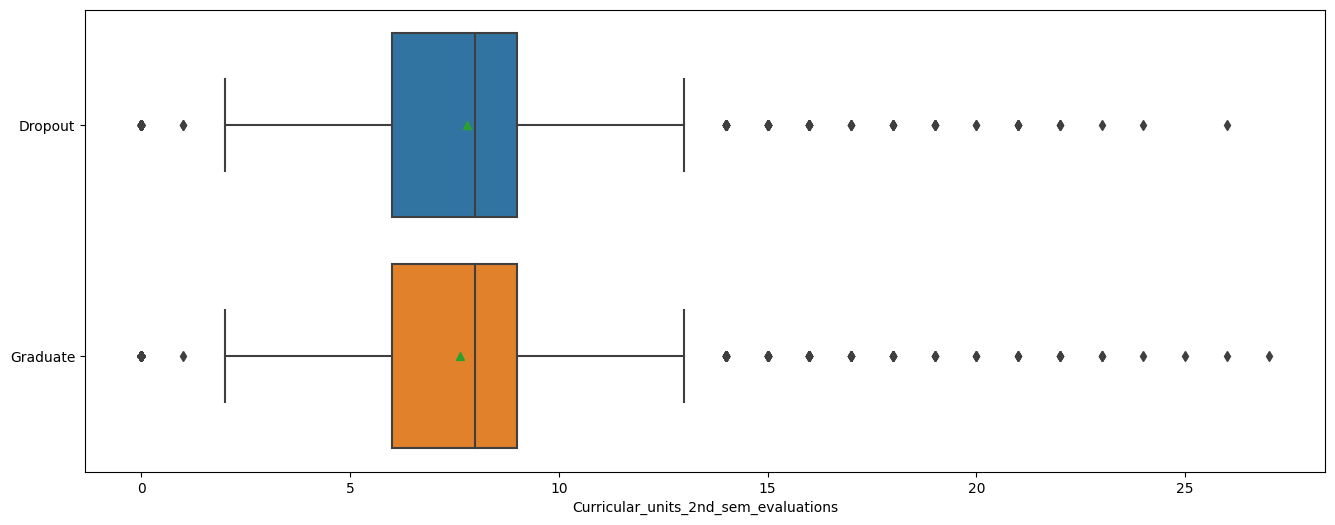

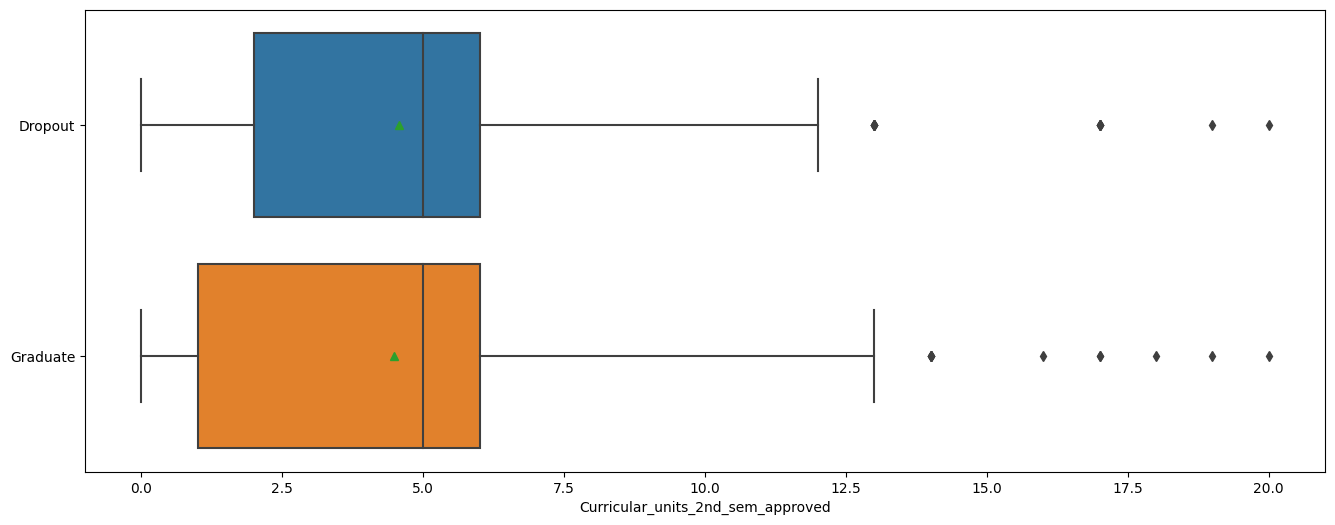

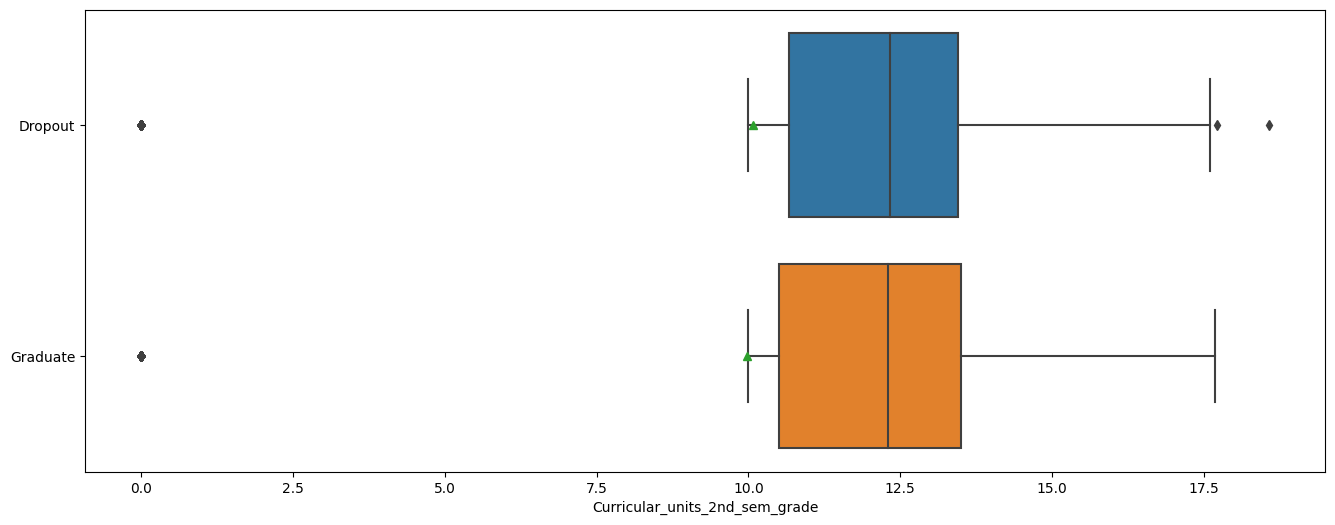

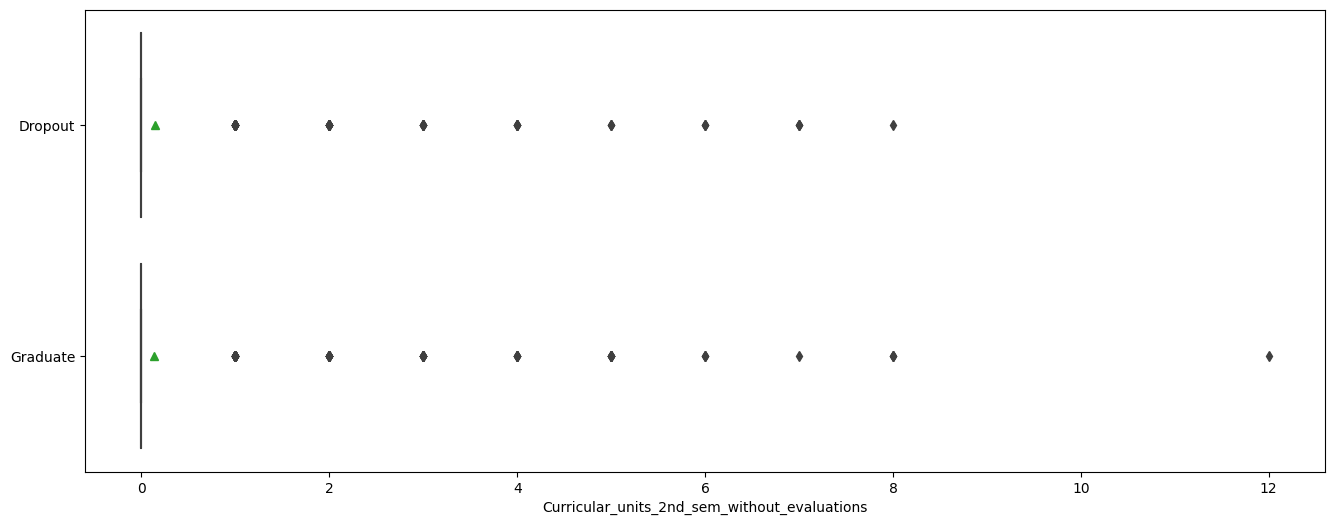

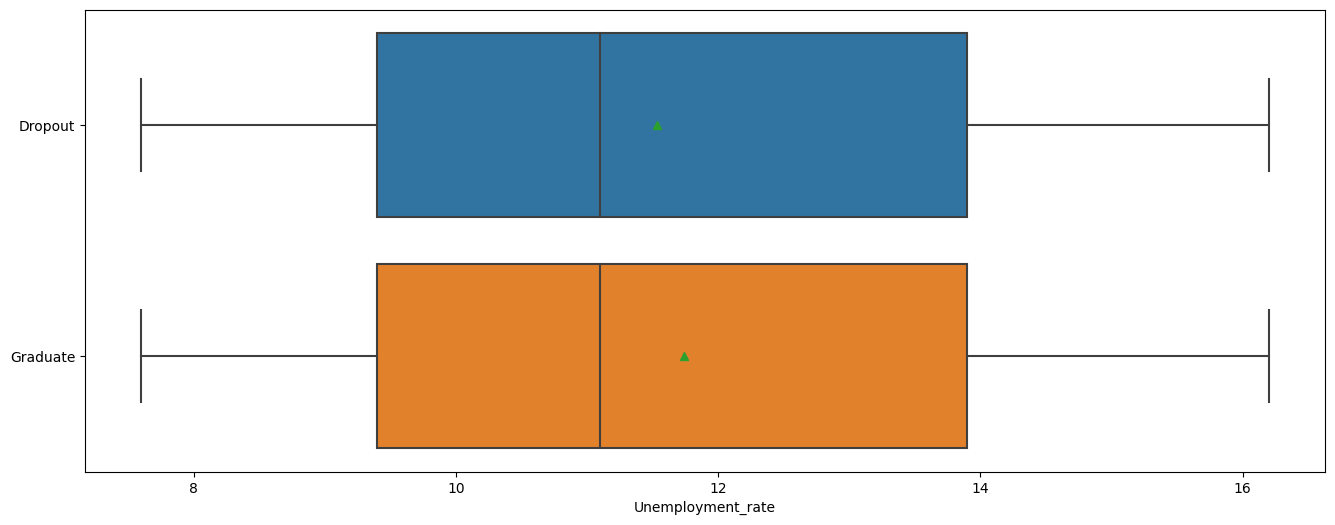

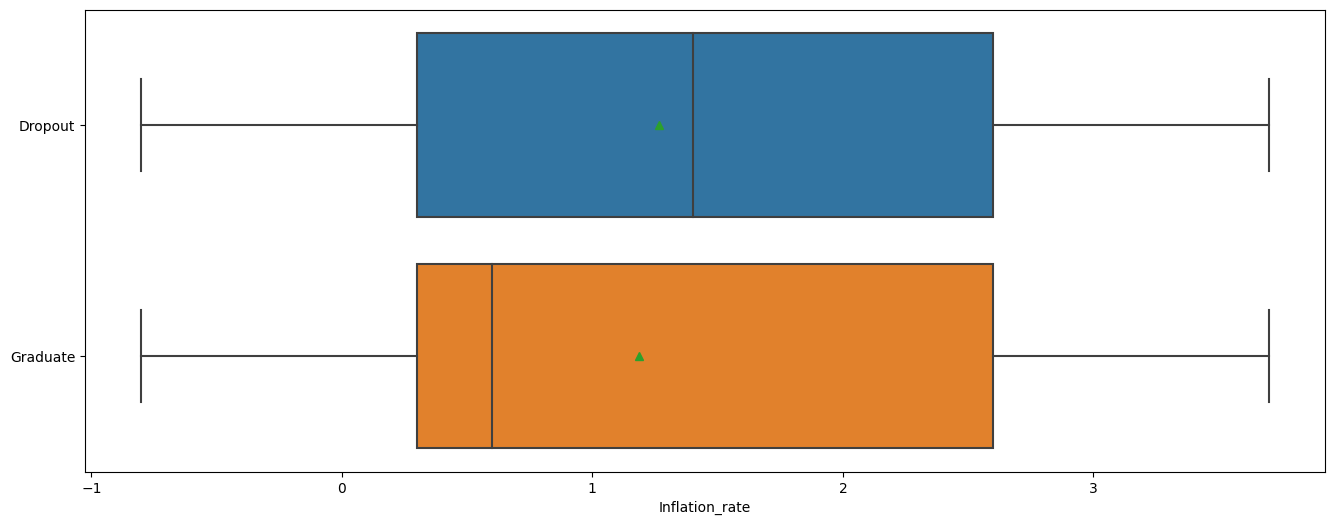

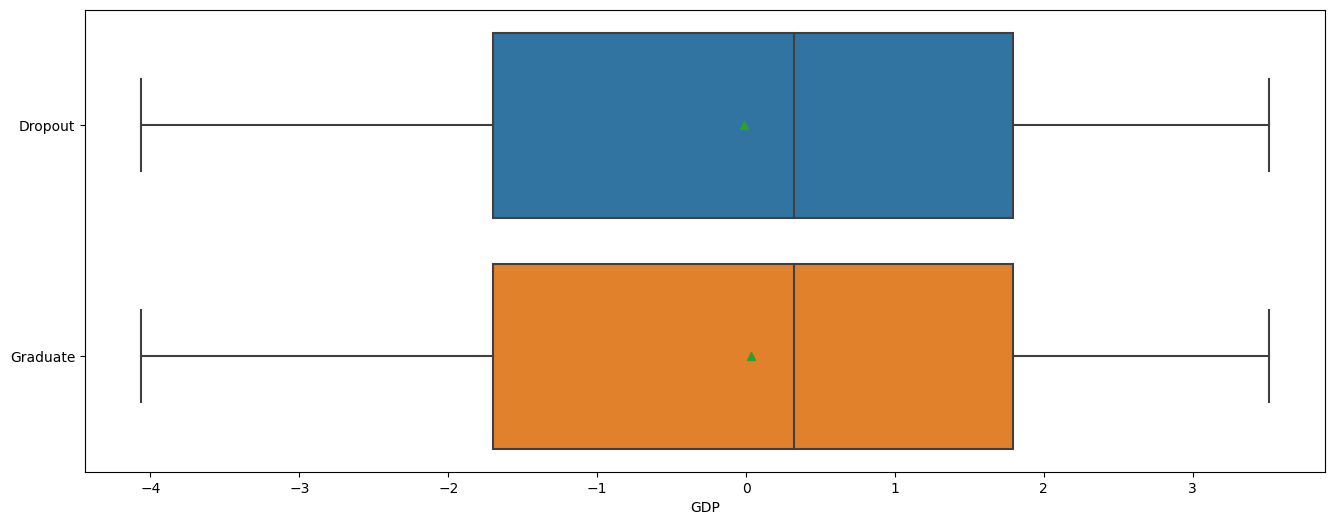

In [108]:
for i in numeric_variable.columns:
    plt.figure(figsize=(16,6))
    sns.boxplot(numeric_variable, x=i, y=status, showmeans=True, orient='h')
    plt.show()

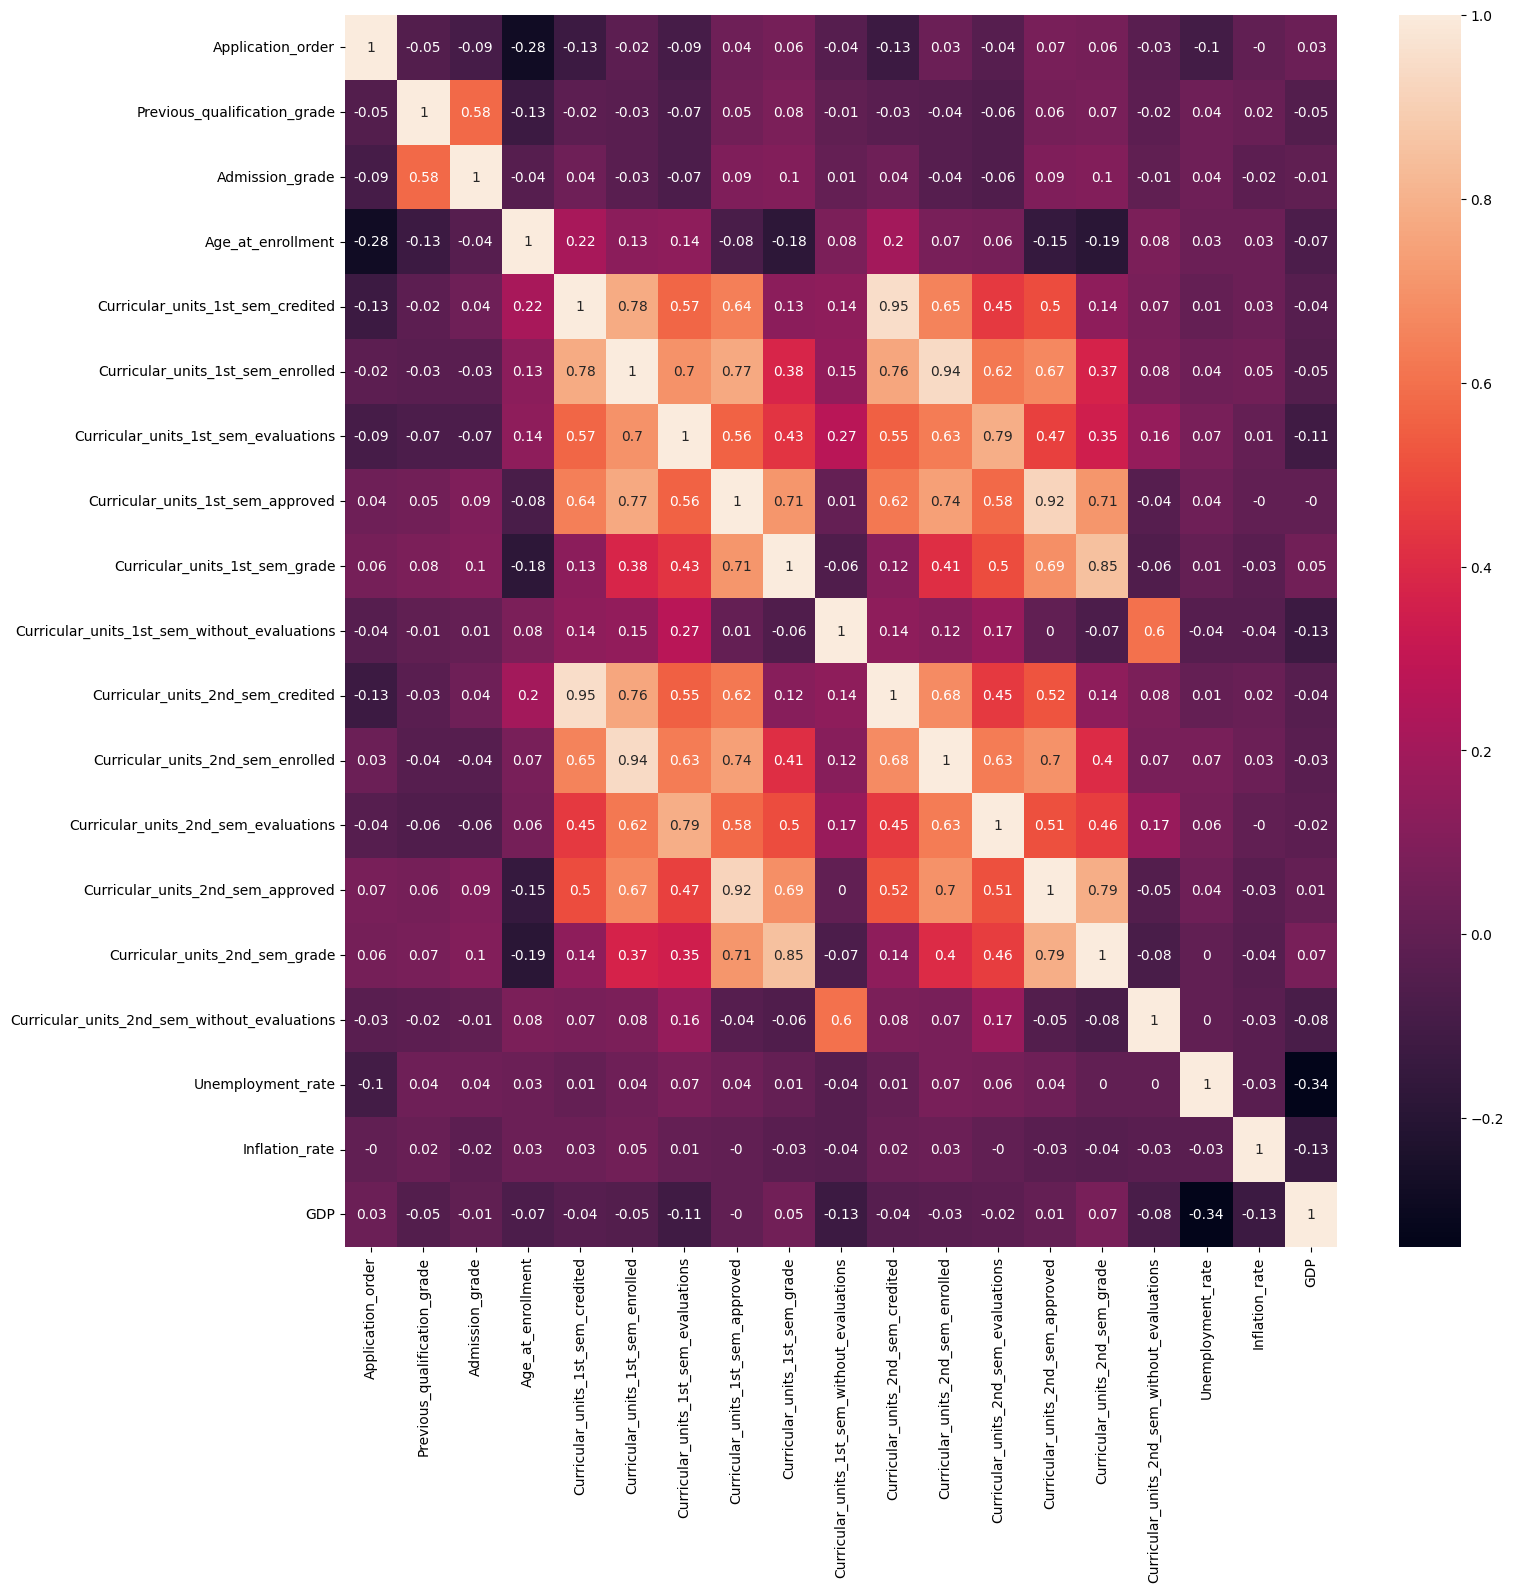

In [109]:
plt.figure(figsize=(16,16))
sns.heatmap(numeric_variable.corr().round(2),annot=True)
plt.show()

It looks like the first curriculum variable correlates with second curriculum. So I think we can drop one of them.

In [110]:
numeric_variable = dataset[[
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]]

## Data Preprocessing

### Feature Selection

In [111]:
significant_numeric_variables = []

for i in range(numeric_variable.shape[1]):
    p_value = f_classif(numeric_variable, status)[1][i]
    var = numeric_variable.keys()[i]
    if p_value < 0.05:
        print(f"reject H0 with p-value: {p_value}")
        print(f"there is significant different for variable {var}")
        print("")
        significant_numeric_variables.append(var)
    else:
        print(f"fail to reject H0 with p-value: {p_value}")
        print(f"there is no significant different for variable {var}")
        print("")

reject H0 with p-value: 1.2296081920646421e-08
there is significant different for variable Application_order

reject H0 with p-value: 3.772810037611078e-11
there is significant different for variable Previous_qualification_grade

reject H0 with p-value: 9.583914186219035e-15
there is significant different for variable Admission_grade

reject H0 with p-value: 2.1138851689816505e-60
there is significant different for variable Age_at_enrollment

reject H0 with p-value: 0.004709153721916953
there is significant different for variable Curricular_units_1st_sem_credited

reject H0 with p-value: 1.5898809028747278e-22
there is significant different for variable Curricular_units_1st_sem_enrolled

reject H0 with p-value: 0.0003132671073329909
there is significant different for variable Curricular_units_1st_sem_evaluations

reject H0 with p-value: 2.8322807176337365e-292
there is significant different for variable Curricular_units_1st_sem_approved

reject H0 with p-value: 1.3290673394391114e-250


In [112]:
numeric_dataset = numeric_variable[significant_numeric_variables]
numeric_dataset.head()

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,GDP
0,5,122.0,127.3,20,0,0,0,0,0.000000,0,1.74
1,1,160.0,142.5,19,0,6,6,6,14.000000,0,0.79
2,5,122.0,124.8,19,0,6,0,0,0.000000,0,1.74
3,2,122.0,119.6,20,0,6,8,6,13.428571,0,-3.12
4,1,100.0,141.5,45,0,6,9,5,12.333333,0,0.79


Those variables above are some variables choosen after ANOVA test.

In [113]:
significant_categorical_variables = []

for i in range(categorical_variable.shape[1]):
    crosstab = pd.crosstab(index=categorical_variable[categorical_variable.keys()[i]], columns=status)
    p_value = stats.chi2_contingency(crosstab)[1]
    var = categorical_variable.keys()[i]
    if p_value < 0.05:
        print(f"reject H0 with p-value: {p_value}")
        print(f"there is significant different for variable {var}")
        print("")
        significant_categorical_variables.append(var)
    else:
        print(f"fail to reject H0 with p-value: {p_value}")
        print(f"there is no significant different for variable {var}")
        print("")

reject H0 with p-value: 3.1607606917048516e-10
there is significant different for variable marital_status

reject H0 with p-value: 8.435153363625389e-73
there is significant different for variable application_mode

reject H0 with p-value: 3.497695352569772e-84
there is significant different for variable course

reject H0 with p-value: 4.7287466970416196e-07
there is significant different for variable time_attendance

reject H0 with p-value: 5.9524532879634e-24
there is significant different for variable previous_qualification

fail to reject H0 with p-value: 0.34128154540789707
there is no significant different for variable nationality

reject H0 with p-value: 2.2012172759487927e-17
there is significant different for variable mother_qualification

reject H0 with p-value: 1.7545504183274772e-16
there is significant different for variable father_qualification

reject H0 with p-value: 1.5551375664452738e-16
there is significant different for variable mother_occupation

reject H0 with p-va

In [115]:
categorical_dataset = categorical_variable[significant_categorical_variables]
categorical_dataset.head()

,marital_status,application_mode,course,time_attendance,previous_qualification,mother_qualification,father_qualification,mother_occupation,father_occupation,displaced,debtor,tuition_fees_up_to_date,gender,scholarship_holder
0,single,2nd phase - general contingent,Animation and Multimedia Design,daytime,Secondary education,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,yes,no,yes,male,no
1,single,International student (bachelor),Tourism,daytime,Secondary education,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,yes,no,no,male,no
2,single,1st phase - general contingent,Communication Design,daytime,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or equiv,Unskilled Workers,Unskilled Workers,yes,no,no,male,no
3,single,2nd phase - general contingent,Journalism and Communication,daytime,Secondary education,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or equiv,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,yes,no,yes,female,no
4,married,Over 23 years old,Social Service (evening attendance),evening,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,no,no,yes,female,no


In [116]:
x = np.concatenate((categorical_dataset, numeric_dataset), axis=1)
y = status

In [117]:
print(x.shape)
x_columns = [categorical_dataset.keys().append(numeric_dataset.keys())]
print(x_columns)

(3630, 25)
[Index(['marital_status', 'application_mode', 'course', 'time_attendance',
       'previous_qualification', 'mother_qualification',
       'father_qualification', 'mother_occupation', 'father_occupation',
       'displaced', 'debtor', 'tuition_fees_up_to_date', 'gender',
       'scholarship_holder', 'Application_order',
       'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations', 'GDP'],
      dtype='object')]


In [118]:
x = pd.DataFrame(data=x,columns=x_columns)
x.head()

,marital_status,application_mode,course,time_attendance,previous_qualification,mother_qualification,father_qualification,mother_occupation,father_occupation,displaced,...,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,GDP
0,single,2nd phase - general contingent,Animation and Multimedia Design,daytime,Secondary education,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,yes,...,122.0,127.3,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.74
1,single,International student (bachelor),Tourism,daytime,Secondary education,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,yes,...,160.0,142.5,19.0,0.0,6.0,6.0,6.0,14.0,0.0,0.79
2,single,1st phase - general contingent,Communication Design,daytime,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or equiv,Unskilled Workers,Unskilled Workers,yes,...,122.0,124.8,19.0,0.0,6.0,0.0,0.0,0.0,0.0,1.74
3,single,2nd phase - general contingent,Journalism and Communication,daytime,Secondary education,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or equiv,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,yes,...,122.0,119.6,20.0,0.0,6.0,8.0,6.0,13.428571,0.0,-3.12
4,married,Over 23 years old,Social Service (evening attendance),evening,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,no,...,100.0,141.5,45.0,0.0,6.0,9.0,5.0,12.333333,0.0,0.79


In [128]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   (marital_status,)                                3630 non-null   object
 1   (application_mode,)                              3630 non-null   object
 2   (course,)                                        3630 non-null   object
 3   (time_attendance,)                               3630 non-null   object
 4   (previous_qualification,)                        3630 non-null   object
 5   (mother_qualification,)                          3630 non-null   object
 6   (father_qualification,)                          3630 non-null   object
 7   (mother_occupation,)                             3630 non-null   object
 8   (father_occupation,)                             3630 non-null   object
 9   (displaced,)                             

In [119]:
print(numeric_dataset.shape)
print(categorical_dataset.shape)
print(x.shape)
print(y.shape)

(3630, 11)
(3630, 14)
(3630, 25)
(3630,)


In [120]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

In [121]:
class MachineLearning:
    def __init__(self, x: pd.DataFrame, y):
        self.x = x
        self.y = y

    def CategoricalTransform(self):
        self.onehot = OneHotEncoder(drop='first', handle_unknown='ignore')
        self.onehot.fit(self.x)
        self.x_encoder = self.onehot.transform(self.x).toarray()
        
    def TrainTest(self, categorical=False, stratify=None):
        if categorical == True:
            self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x_encoder, self.y, random_state=42, stratify=stratify)
        else:
            self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, random_state=42, stratify=stratify)
            
    def Scaler(self, scale=None):
        if scale == 'minmax':
            self.scala = MinMaxScaler().fit(self.x_train)
            self.x_train = self.scala.transform(self.x_train)
            self.x_test = self.scala.transform(self.x_test)
        elif scale == 'standard':
            self.scala = StandardScaler().fit(self.x_train)
            self.x_train = self.scala.transform(self.x_train)
            self.x_test = self.scala.transform(self.x_test)
        else:
            self.x_train = self.x_train
            self.x_test = self.x_test
            
    def Classification(self):
        self.classification_models = [
            LogisticRegression(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            GradientBoostingClassifier(),
            SVC(),
            KNeighborsClassifier(),
            MLPClassifier()]
        self.classification_names = [
            'classic_classification',
            'decision_tree',
            'random_forest',
            'gradient_boosting',
            'support_vector_machine',
            'k-nearest_neighbors',
            'multi_layer_perceptron']
        self.classification_acuracy = []
        self.times = []
        for m in self.classification_models:
            self.starting = round(t.time())
            m.fit(self.x_train, self.y_train)
            self.y_pred = m.predict(self.x_test)
            self.score = accuracy_score(y_true=self.y_test, y_pred=self.y_pred)
            self.classification_acuracy.append(self.score)
            self.ending = round(t.time())
            self.time_count = self.ending - self.starting
            self.time_counts = str(self.time_count) + 's'
            self.times.append(self.time_counts)
        self.result = pd.DataFrame({
            "Algorithm":self.classification_names, 
            'Accuracy':self.classification_acuracy, 
            'Time':self.times})
        return self.result.sort_values(['Accuracy'], ascending=False)

    def BuildModel(self, algorithm):
        self.x_encoder = self.onehot.transform(self.x).toarray()
        self.scaler = MinMaxScaler().fit(self.x_encoder)
        self.x_scale = self.scaler.transform(self.x_encoder)
        self.cv_accuracy = cross_val_score(algorithm, self.x_scale, self.y, cv=4)
        print(f"model accuracy: {np.mean(self.cv_accuracy)}")
        self.model = algorithm
        self.model.fit(self.x_scale, self.y)

    def Predict(self, feature: pd.DataFrame):
        self.feature = self.onehot.transform(feature).toarray()
        self.feature_scale = self.scaler.transform(self.feature)
        return self.model.predict(self.feature_scale)
        print(self.model.predict(self.feature_scale))

In [45]:
clf = MachineLearning(x=x, y=y)
clf.CategoricalTransform()
clf.TrainTest(categorical=True, stratify=y)
clf.Scaler(scale='minmax')
clf.Classification()

,Algorithm,Accuracy,Time
4,support_vector_machine,0.874449,10s
0,classic_classification,0.873348,0s
3,gradient_boosting,0.873348,27s
2,random_forest,0.855727,3s
6,multi_layer_perceptron,0.827093,31s
1,decision_tree,0.822687,1s
5,k-nearest_neighbors,0.774229,0s


We can see that gradient boosting is one of the best algorithm but takes long time, maybe we can try xgboost.

In [138]:
dataset_clean = x
dataset_clean['graduate'] = y

In [139]:
dataset_clean.head()

,marital_status,application_mode,course,time_attendance,previous_qualification,mother_qualification,father_qualification,mother_occupation,father_occupation,displaced,...,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,GDP,graduate
0,single,2nd phase - general contingent,Animation and Multimedia Design,daytime,Secondary education,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,yes,...,127.3,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.74,Dropout
1,single,International student (bachelor),Tourism,daytime,Secondary education,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,yes,...,142.5,19.0,0.0,6.0,6.0,6.0,14.0,0.0,0.79,Graduate
2,single,1st phase - general contingent,Communication Design,daytime,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or equiv,Unskilled Workers,Unskilled Workers,yes,...,124.8,19.0,0.0,6.0,0.0,0.0,0.0,0.0,1.74,Dropout
3,single,2nd phase - general contingent,Journalism and Communication,daytime,Secondary education,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or equiv,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,yes,...,119.6,20.0,0.0,6.0,8.0,6.0,13.428571,0.0,-3.12,Graduate
4,married,Over 23 years old,Social Service (evening attendance),evening,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,no,...,141.5,45.0,0.0,6.0,9.0,5.0,12.333333,0.0,0.79,Graduate


In [140]:
# dataset_clean.to_csv('dataset_clean.csv')

In [141]:
x_second = dataset_clean.iloc[:,:-1]
y_second = dataset_clean.iloc[:,-1]
y_second = pd.get_dummies(y_second, drop_first=True).values

# x = dataset.iloc[:,:-1]
# y = dataset.iloc[:,-1]
# y = pd.get_dummies(y, drop_first=True)

In [142]:
numeric_dataset.keys()

Index(['Application_order', 'Previous_qualification_grade', 'Admission_grade',
       'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations', 'GDP'],
      dtype='object')

In [143]:
x_second[numeric_dataset.keys()]

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,GDP
0,5.0,122.0,127.3,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.74
1,1.0,160.0,142.5,19.0,0.0,6.0,6.0,6.0,14.0,0.0,0.79
2,5.0,122.0,124.8,19.0,0.0,6.0,0.0,0.0,0.0,0.0,1.74
3,2.0,122.0,119.6,20.0,0.0,6.0,8.0,6.0,13.428571,0.0,-3.12
4,1.0,100.0,141.5,45.0,0.0,6.0,9.0,5.0,12.333333,0.0,0.79
...,...,...,...,...,...,...,...,...,...,...,...
3625,6.0,125.0,122.2,19.0,0.0,6.0,7.0,5.0,13.6,0.0,-4.06
3626,2.0,120.0,119.0,18.0,0.0,6.0,6.0,6.0,12.0,0.0,2.02
3627,1.0,154.0,149.5,30.0,0.0,7.0,8.0,7.0,14.9125,0.0,0.79
3628,1.0,180.0,153.8,20.0,0.0,5.0,5.0,5.0,13.8,0.0,-3.12


In [144]:
onehot = OneHotEncoder(sparse_output=False)
onehot.fit(x_second[categorical_dataset.keys()])

OneHotEncoder(sparse_output=False)

In [145]:
x_onehot = onehot.transform(x_second[categorical_dataset.keys()].values,)
x_number = x_second[numeric_dataset.keys()].values
x_merge = np.concatenate((x_onehot, x_number), axis=1)

In [146]:
scaler = MinMaxScaler()
scaler.fit(x_merge)
x_scaler = scaler.transform(x_merge)

In [147]:
# joblib.dump(onehot, "onehot.joblib")
# joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [148]:
import xgboost as xgb

In [150]:
starting = round(t.time())
xgb_model = xgb.XGBClassifier(learning_rate=0.1,
                              max_depth=6,
                              min_child_weight=1,
                              gamma=0,
                              subsample=0.8,
                              colsample_bytree=0.8)
xgb_model.fit(x_scaler, y_second)
ending = round(t.time())

In [151]:
time_count = ending - starting
time_count = str(time_count) + 's'
print(f"xgboost training time spend: {time_count}")

xgboost training time spend: 2s


In [153]:
xgb_model.score(x_scaler, y_second)

0.9633608815426997

In [154]:
# himpunan_kategorikal = onehot.transform([kategorikal])
# himpunan = np.concatenate((himpunan_kategorikal, [numerik]), axis=1)
# himpunan_scaler = scaler.transform(himpunan)

# def Predict(array):
#     pred = clf.predict(array)
#     if pred == 0:
#         return 'DROPOUT'
#     else:
#         return 'GRADUATE'

In [155]:
xgb_model.save_model("xgb_model.json")